In [1]:
import pandas as pd
df = pd.read_csv("C:\\Users\\HP\\Desktop\\data_science\\primo_anno\\DataViz\\Csv Progetto\\SerieA_2425stats_merged.csv")
df["PrgDistPass_avg"] = (df["PrgDist_pass"] / df["PrgP"]) * 0.9144
df["PrgDistCarry_avg"] = (df["PrgDist_carry"] / df["PrgC"]) * 0.9144
df.head()

,Rk,Squad,Pts,Pts/MP,GA,xGA,xGD,xGD/90,GD,xGA_90,...,Tkl,TklW,Int,Tkl+Int,Def_3rd_tackles,Mid_3rd_tackles,Att_3rd_tackles,TKlW%,PrgDistPass_avg,PrgDistCarry_avg
0,1,Napoli,82,2.16,27,29.6,23.3,0.61,32,0.778947,...,535,323,270,805,237,238,60,0.603738,58.316363,43.758804
1,2,Inter,81,2.13,35,36.4,30.5,0.80,44,0.957895,...,505,288,227,732,215,198,92,0.570297,57.005705,53.916661
2,3,Atalanta,74,1.95,37,38.6,26.4,0.69,41,1.015789,...,571,347,296,867,238,260,73,0.607706,48.972537,42.879957
3,4,Juventus,70,1.84,35,34.0,16.9,0.45,23,0.894737,...,606,353,215,821,273,245,88,0.582508,57.856156,50.958044
4,5,Roma,69,1.82,35,40.9,12.1,0.32,21,1.076316,...,551,328,282,833,233,236,82,0.595281,58.899909,47.715536


In [2]:
df.shape

(20, 73)

In [3]:
df.columns

Index(['Rk', 'Squad', 'Pts', 'Pts/MP', 'GA', 'xGA', 'xGD', 'xGD/90', 'GD',
       'xGA_90', 'GA_x90', 'xG_90', 'npxG_90', 'Gls_x90', 'Cmp', 'Cmp%',
       'short_Cmp', 'med_Cmp', 'long_Cmp', 'PrgDist_pass', 'PrgP', 'KP',
       'passes_into_last_1/3', 'PPA', 'CrsPA', 'short_Cmp%', 'med_Cmp%',
       'long_Cmp%', 'SoT/90', 'G/SoT', 'SoT%', 'Dist', 'npxG', 'npxG/Sh',
       'G-xG', 'SCA90', 'GCA90', 'Pass_Leading_to_Shot_nodeadballs',
       'Passes_from_deadballs_Leading_to_Shot', 'dribbl_lead_to_shot',
       'Foul_Drawn_toShot', 'Def_action_toShot',
       'Pass_Leading_to_Goal_nodeadballs',
       'Passes_from_deadballs_Leading_to_Goal', 'dribbl_lead_to_goal',
       'Foul_Drawn_toGoal', 'Def_action_toGoal', 'Poss', 'Touches',
       'Def_3rd_touches', 'Mid_3rd', 'Att_3rd_touches', 'Att Pen', 'Succ%',
       'Carries', 'TotDist', 'PrgDist_carry', 'PrgC', 'Carries_into_last_1/3',
       'PrgR', 'touches_x90', 'PrgC_x90', 'PrgR_x90', 'Tkl', 'TklW', 'Int',
       'Tkl+Int', 'Def_3rd_tac

## Possession vs Directness

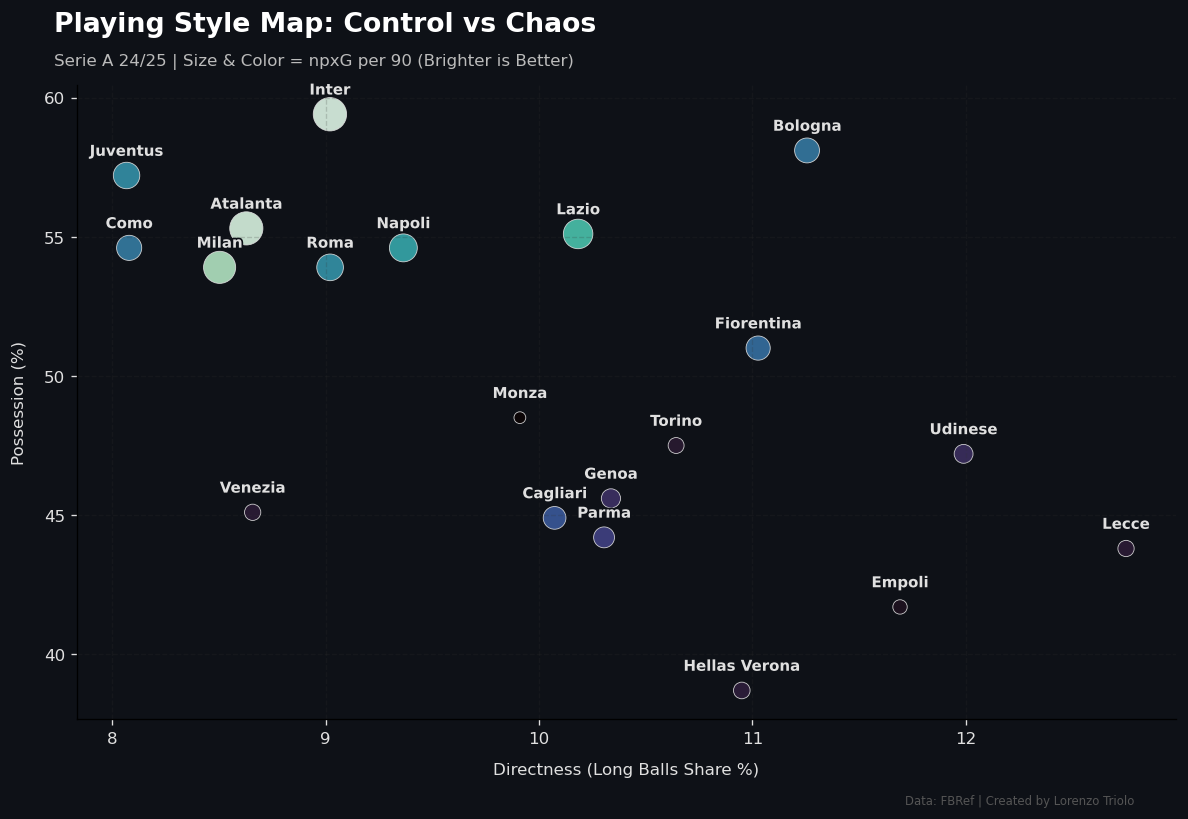

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patheffects as path_effects

# --- 1. SETUP DELLO STILE "DARK PRO" ---
BG_COLOR = '#0e1117'       # Sfondo scuro (stile GitHub/VSCode)
TEXT_COLOR = '#E0E0E0'     # Bianco sporco per i testi
GRID_COLOR = '#333333'     # Griglia sottile e discreta

# Applichiamo lo stile globale a Matplotlib
plt.rcParams.update({
    'figure.facecolor': BG_COLOR,
    'axes.facecolor': BG_COLOR,
    'savefig.facecolor': BG_COLOR,
    'text.color': TEXT_COLOR,
    'axes.labelcolor': TEXT_COLOR,
    'xtick.color': TEXT_COLOR,
    'ytick.color': TEXT_COLOR,
    'grid.color': GRID_COLOR,
    'font.family': 'sans-serif',  # Usa 'Roboto' o 'Arial' se li hai
    'axes.spines.top': False,
    'axes.spines.right': False,
})

df["Directness"] = df["long_Cmp%"] 
# df["Squad"] = ...

# --- 3. CREAZIONE GRAFICO ---
fig, ax = plt.subplots(figsize=(10, 7), dpi=120)

# Scatterplot
sns.scatterplot(
    data=df,
    x="Directness",
    y="Poss",
    size="npxG_90",
    hue="npxG_90",
    palette="mako",    # Palette turchese/verde che "brilla" sul nero
    sizes=(50, 400),     # Dimensioni bolle più marcate
    alpha=0.9,
    edgecolor=TEXT_COLOR,
    linewidth=0.5,
    legend=False,        # Rimuoviamo la legenda automatica per pulizia
    ax=ax
)

# Etichette Squadre con "Outline" per leggibilità
for _, r in df.iterrows():
    text = ax.text(
        r["Directness"], r["Poss"]+0.6,  # Leggermente sopra il punto
        r["Squad"], 
        fontsize=9, 
        ha="center", 
        va="bottom",
        color=TEXT_COLOR,
        fontweight='bold'
    )
    # Trucco: bordo nero attorno al testo per staccarlo dallo sfondo
    text.set_path_effects([path_effects.withStroke(linewidth=2, foreground=BG_COLOR)])

# --- 4. DETTAGLI & STORYTELLING ---
# Titoli personalizzati (invece di ax.set_title)
fig.text(0.05, 0.94, "Playing Style Map: Control vs Chaos", fontsize=16, fontweight='bold', color='white')
fig.text(0.05, 0.90, "Serie A 24/25 | Size & Color = npxG per 90 (Brighter is Better)", fontsize=10, color='#bbbbbb')

# Assi e Griglia
ax.set_xlabel("Directness (Long Balls Share %)", fontsize=10, labelpad=10)
ax.set_ylabel("Possession (%)", fontsize=10, labelpad=10)
ax.grid(True, linestyle='--', alpha=0.2)

# Footer discreto
fig.text(0.95, 0.02, "Data: FBRef | Created by Lorenzo Triolo", ha='right', fontsize=7, color='#555555')

plt.tight_layout(rect=[0, 0.03, 1, 0.90]) # Lascia spazio per header/footer
plt.show()


## Shot volume vs shot quality

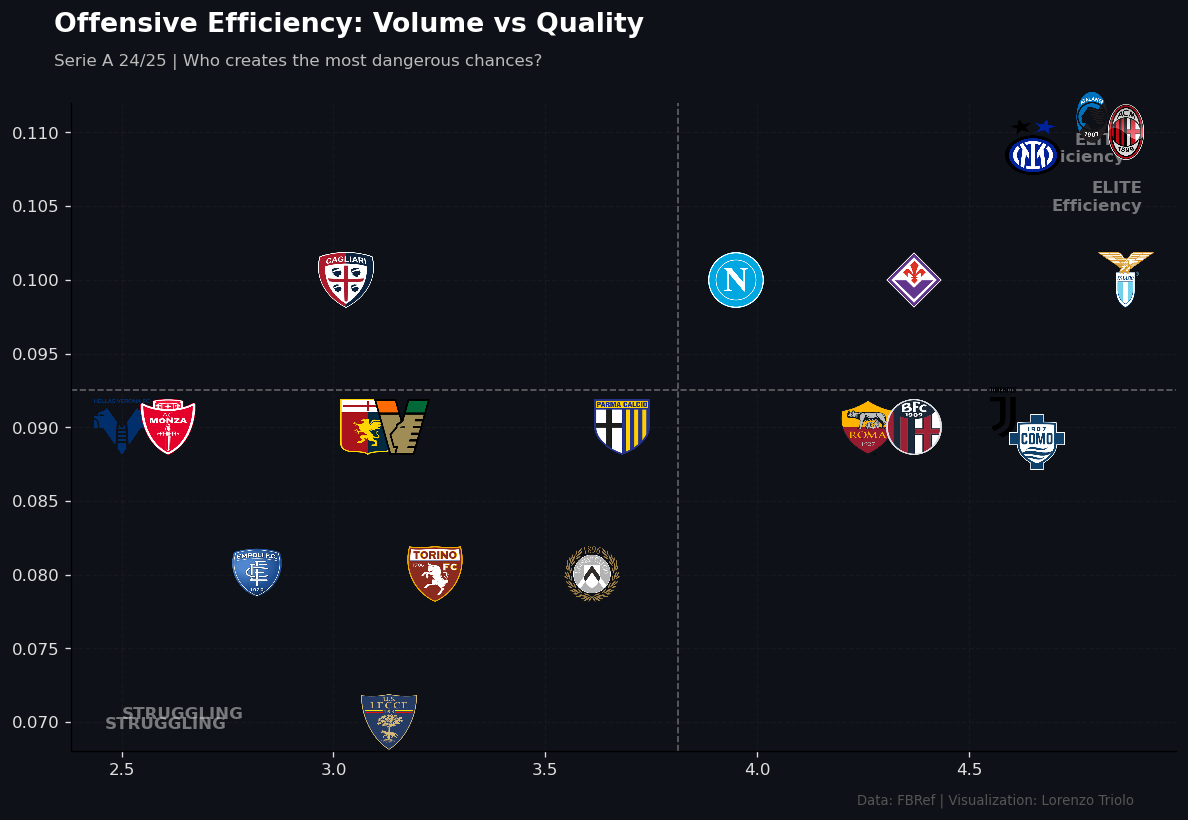

In [5]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import seaborn as sns
from PIL import Image
import numpy as np
import os

# --- 1. SETUP STYLE DARK ---
BG_COLOR = '#0e1117'
TEXT_COLOR = '#E0E0E0'
GRID_COLOR = '#444444'

plt.rcParams.update({
    'figure.facecolor': BG_COLOR,
    'axes.facecolor': BG_COLOR,
    'text.color': TEXT_COLOR,
    'axes.labelcolor': TEXT_COLOR,
    'xtick.color': TEXT_COLOR,
    'ytick.color': TEXT_COLOR,
    'grid.color': GRID_COLOR,
    'font.family': 'sans-serif',
    'axes.spines.top': False,
    'axes.spines.right': False,
})

# --- Funzioni Helper per Loghi (dimensione FISSA) ---
def get_logo_path(squad_name):
    base_path = r"C:\Users\HP\Desktop\data_science\primo_anno\DataViz\loghi"
    return os.path.join(base_path, f"{squad_name}.png")

def add_logo(ax, x, y, logo_path, zoom=0.13):
    """
    Forza tutti i loghi a 256x256 px (stessa dimensione),
    poi li disegna con lo stesso zoom.
    """
    try:
        img = Image.open(logo_path).convert("RGBA")
        base_size = 256  # dimensione fissa per tutti

        # ridimensiona SEMPRE al quadrato 256x256, alta qualità
        img = img.resize((base_size, base_size), Image.Resampling.LANCZOS)

        imagebox = OffsetImage(img, zoom=zoom)
        ab = AnnotationBbox(imagebox, (x, y), frameon=False)
        ax.add_artist(ab)
    except Exception as e:
        print(f"Logo non trovato o errore per {logo_path}: {e}")
        ax.scatter(x, y, c='red', s=50)

# --- CREAZIONE GRAFICO ---
fig, ax = plt.subplots(figsize=(10, 7), dpi=120)

# Plot invisibile per limiti assi
ax.scatter(df["SoT/90"], df["npxG/Sh"], alpha=0)

# --- LINEE MEDIE (QUADRANTI) ---
mean_x = df["SoT/90"].mean()
mean_y = df["npxG/Sh"].mean()

ax.axvline(mean_x, color=TEXT_COLOR, linestyle='--', alpha=0.4, linewidth=1)
ax.axhline(mean_y, color=TEXT_COLOR, linestyle='--', alpha=0.4, linewidth=1)

ax.text(df["SoT/90"].max(), df["npxG/Sh"].max(), "ELITE\nEfficiency",
        color=TEXT_COLOR, ha="right", va="top", fontsize=10, fontweight='bold', alpha=0.5)
ax.text(df["SoT/90"].min(), df["npxG/Sh"].min(), "STRUGGLING",
        color=TEXT_COLOR, ha="left", va="bottom", fontsize=10, fontweight='bold', alpha=0.5)

# --- LOGHI & CORREZIONI POSIZIONE ---
manual_shift = {
    "Inter":    {"dx": -0.06, "dy": -0.001},
    "Atalanta": {"dx":  0.03, "dy":  0.001},
    "Juventus": {"dx": -0.03, "dy":  0.001},
    "Como":     {"dx":  0.03, "dy": -0.001},
}

used_pos = {}

for _, r in df.iterrows():
    x, y = r["SoT/90"], r["npxG/Sh"]

    # jitter minimale per punti coincidenti
    key = (round(x, 2), round(y, 3))
    if key in used_pos:
        idx = len(used_pos[key])
        x += 0.02 * idx
        y += 0.001 * idx
        used_pos[key].append((x, y))
    else:
        used_pos[key] = [(x, y)]

    if r["Squad"] in manual_shift:
        x += manual_shift[r["Squad"]]["dx"]
        y += manual_shift[r["Squad"]]["dy"]

    logo_path = get_logo_path(r["Squad"])
    add_logo(ax, x, y, logo_path, zoom=0.13)  # stesso zoom per tutti

# --- TITOLI E LABEL ---
fig.text(0.05, 0.94, "Offensive Efficiency: Volume vs Quality",
         fontsize=16, fontweight='bold', color='white')
fig.text(0.05, 0.90,
         "Serie A 24/25 | Who creates the most dangerous chances?",
         fontsize=10, color='#bbbbbb')

# Alto a Destra (Elite) - Un po' staccato dal bordo (0.97, 0.97)
ax.text(0.97, 0.88, "ELITE\nEfficiency", transform=ax.transAxes,
        color=TEXT_COLOR, ha="right", va="top", fontsize=10, fontweight='bold', alpha=0.5, zorder=1)
# Basso a Sinistra (Struggling) - Un po' staccato dal bordo (0.03, 0.03)
ax.text(0.03, 0.03, "STRUGGLING", transform=ax.transAxes,
        color=TEXT_COLOR, ha="left", va="bottom", fontsize=10, fontweight='bold', alpha=0.5)
ax.grid(True, linestyle='--', alpha=0.15)

fig.text(0.95, 0.02, "Data: FBRef | Visualization: Lorenzo Triolo",
         ha='right', fontsize=8, color='#555555')

plt.tight_layout(rect=[0, 0.03, 1, 0.90])
plt.show()


## Defensive over and underperformance

C:\Users\HP\AppData\Local\Temp\ipykernel_21412\238135542.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=df_sorted_def, x="Def_Overperformance", y="Squad", palette=colors, ax=ax)


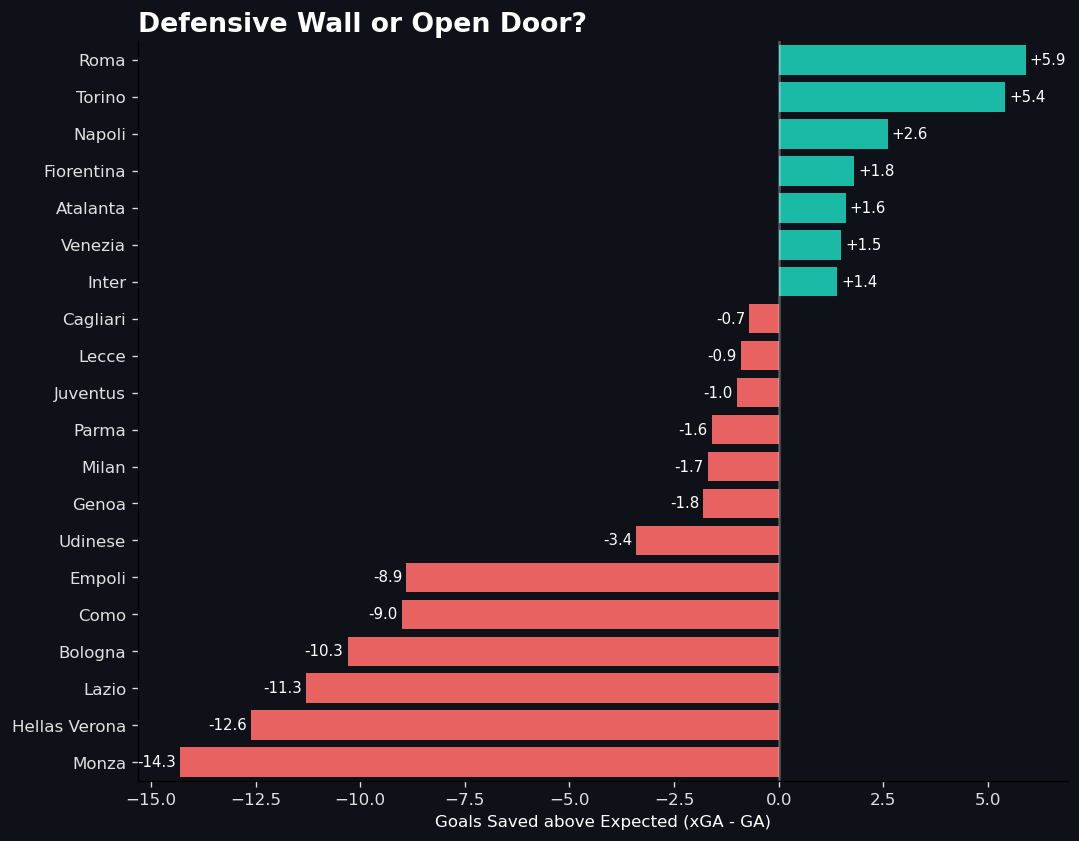

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
# Calcolo overperformance difensiva (xGA - GA)
# Se positivo = Hai subito MENO gol del previsto (Bravo portiere/Difesa)
# Se negativo = Hai subito PIÙ gol del previsto (Errori/Sfortuna)
df["Def_Overperformance"] = df["xGA"] - df["GA"]
df_sorted_def = df.sort_values("Def_Overperformance", ascending=False) # I migliori (valori alti positivi) in basso

fig, ax = plt.subplots(figsize=(10, 8), dpi=120)
# Palette: Rosso (Male, valori negativi) -> Verde/Blu (Bene, valori positivi)
colors = ['#ff4b4b' if v < 0 else '#00d4bb' for v in df_sorted_def["Def_Overperformance"]]

bars = sns.barplot(data=df_sorted_def, x="Def_Overperformance", y="Squad", palette=colors, ax=ax)

# Etichette
for i, bar in enumerate(bars.patches):
    val = df_sorted_def["Def_Overperformance"].iloc[i]
    ax.text(val + (0.1 if val > 0 else -0.1), bar.get_y() + 0.4, f"{val:+.1f}",
            va='center', ha='left' if val > 0 else 'right', color='white', fontsize=9)

ax.axvline(0, color='white', alpha=0.3)
ax.set_title("Defensive Wall or Open Door?", color='white', fontsize=16, fontweight='bold', loc='left')
ax.set_xlabel("Goals Saved above Expected (xGA - GA)", color='white')
ax.set_ylabel("")
plt.show()



## Offensive Over/under performance

C:\Users\HP\AppData\Local\Temp\ipykernel_21412\1784434397.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


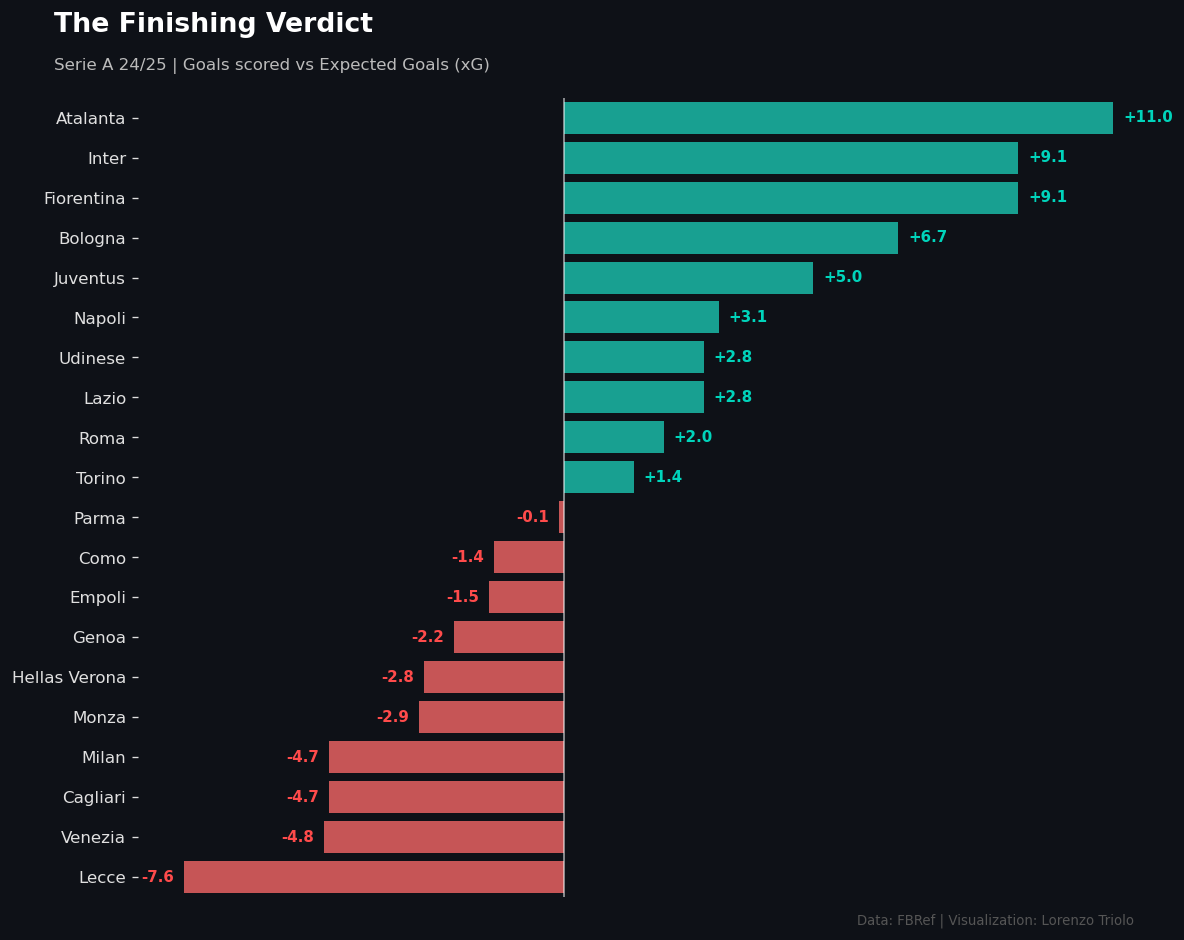

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_sorted = df.sort_values("G-xG", ascending=False)

# --- 1. SETUP STYLE DARK (Lo stesso di prima per coerenza) ---
BG_COLOR = '#0e1117'
TEXT_COLOR = '#E0E0E0'

plt.rcParams.update({
    'figure.facecolor': BG_COLOR,
    'axes.facecolor': BG_COLOR,
    'text.color': TEXT_COLOR,
    'axes.labelcolor': TEXT_COLOR,
    'xtick.color': TEXT_COLOR,
    'ytick.color': TEXT_COLOR,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.spines.left': False, # Togliamo anche la spina sinistra per pulizia
    'axes.spines.bottom': False
})

# --- DATI E ORDINAMENTO ---
# df_sorted = df.sort_values("G-xG", ascending=False) # Già fatto da te

# Creiamo una colonna colore personalizzata
# Overperformance (>0) -> 'cyan' o '#00d4bb'
# Underperformance (<0) -> 'crimson' o '#ff4b4b' (più moderni del rosso standard)
colors = ['#00d4bb' if v >= 0 else '#ff4b4b' for v in df_sorted["G-xG"]]

# --- CREAZIONE GRAFICO ---
fig, ax = plt.subplots(figsize=(10, 8), dpi=120)

# Barplot Orizzontale
bars = sns.barplot(
    data=df_sorted,
    x="G-xG",
    y="Squad",
    palette=colors,
    alpha=0.85, # Leggera trasparenza
    ax=ax
)

# --- TOCCO PRO: AGGIUNGERE I VALORI SULLE BARRE ---
for i, bar in enumerate(bars.patches):
    value = df_sorted["G-xG"].iloc[i]
    width = bar.get_width()
    
    # Logica posizionamento etichetta
    if value >= 0:
        align = 'left'
        x_pos = width + 0.2
        color_text = '#00d4bb' # Stesso colore barra
    else:
        align = 'right'
        x_pos = width - 0.2
        color_text = '#ff4b4b'

    ax.text(
        x_pos, 
        bar.get_y() + bar.get_height()/2, 
        f"{value:+.1f}", # Formato con segno (+1.2, -0.5)
        va='center', 
        ha=align, 
        color=color_text, 
        fontweight='bold', 
        fontsize=9
    )

# --- LINEA ZERO CENTRALE ---
ax.axvline(0, color='white', linewidth=1.2, alpha=0.5)

# --- TITOLI E CLEANUP ---
fig.text(0.05, 0.95, "The Finishing Verdict", fontsize=16, fontweight='bold', color='white')
fig.text(0.05, 0.91, "Serie A 24/25 | Goals scored vs Expected Goals (xG)", fontsize=10, color='#bbbbbb')

# Rimuoviamo asse X (i numeri sono già sulle barre)
ax.set_xticks([]) 
ax.set_xlabel("")
ax.set_ylabel("")

# Footer
fig.text(0.95, 0.02, "Data: FBRef | Visualization: Lorenzo Triolo", ha='right', fontsize=8, color='#555555')

plt.tight_layout(rect=[0, 0.03, 1, 0.90])
plt.show()


## Chance creation

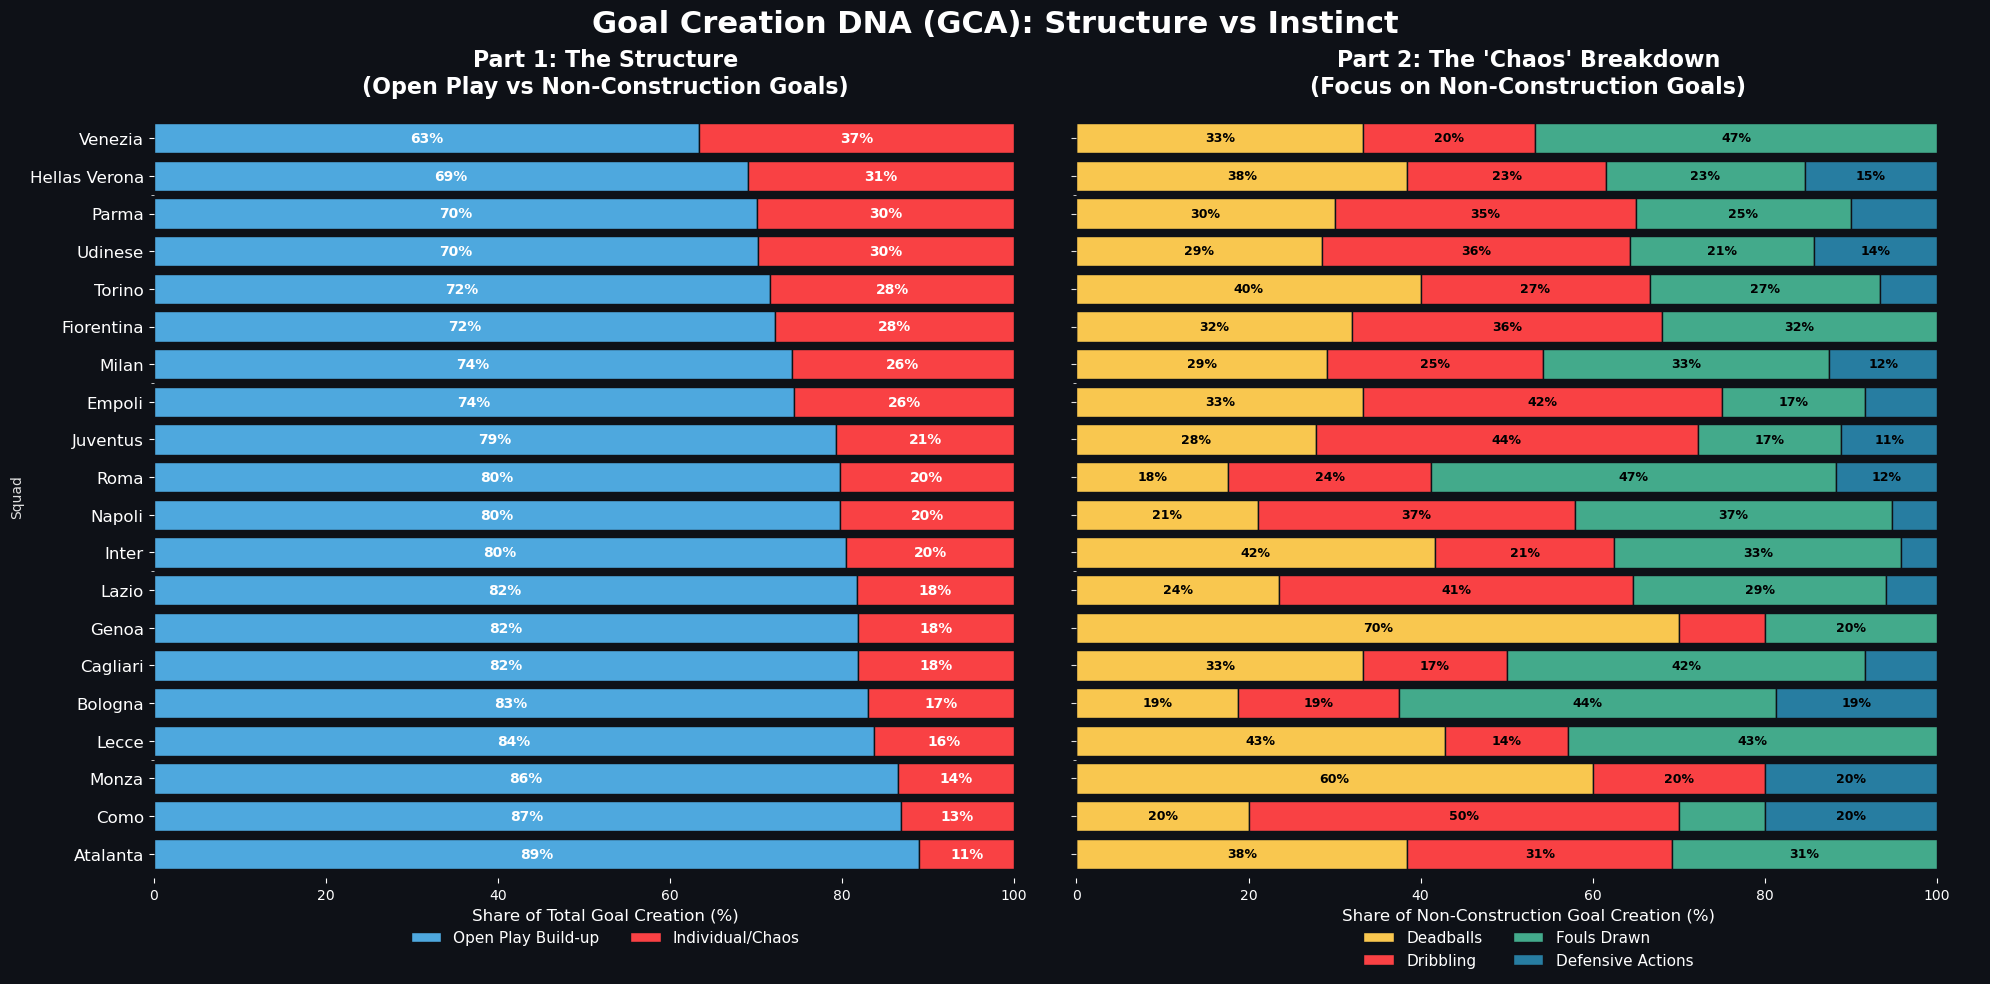

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Load Data
# df = pd.read_csv('SerieA_2425stats_merged.csv') # Uncomment to load

# 2. Define GCA Columns (Goal Creation instead of Shot Creation)
open_play_col_gca = "Pass_Leading_to_Goal_nodeadballs"
special_cols_gca = [
    "Passes_from_deadballs_Leading_to_Goal", # Set-pieces
    "dribbl_lead_to_goal",                   # Dribbles
    "Foul_Drawn_toGoal",                     # Fouls Drawn
    "Def_action_toGoal"                      # Defensive Actions
]

labels_map_gca = {
    "Passes_from_deadballs_Leading_to_Goal": "Deadballs",
    "dribbl_lead_to_goal": "Dribbling",
    "Foul_Drawn_toGoal": "Fouls Drawn",
    "Def_action_toGoal": "Defensive Actions"
}

# 3. Process Data
df_analysis_gca = df[["Squad", open_play_col_gca] + special_cols_gca].set_index("Squad")
df_analysis_gca = df_analysis_gca.fillna(0) # Handle zeros

# Calculate "Non-Construction" sum
df_analysis_gca["Non-Construction"] = df_analysis_gca[special_cols_gca].sum(axis=1)

# PART 1: OVERVIEW (Open Play vs Non-Construction)
df_overview_gca = df_analysis_gca[[open_play_col_gca, "Non-Construction"]]
df_overview_norm_gca = df_overview_gca.div(df_overview_gca.sum(axis=1), axis=0) * 100
df_overview_norm_gca = df_overview_norm_gca.sort_values(by="Non-Construction", ascending=True)

# PART 2: DEEP DIVE (Breakdown of Non-Construction)
df_special_gca = df_analysis_gca[special_cols_gca]
# Avoid division by zero if a team has 0 non-construction goals
df_special_sum = df_special_gca.sum(axis=1).replace(0, 1)
df_special_norm_gca = df_special_gca.div(df_special_sum, axis=0) * 100
df_special_norm_gca = df_special_norm_gca.reindex(df_overview_norm_gca.index)

# 4. Setup Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), sharey=True)
fig.set_facecolor('#0e1117')

# --- PLOT 1 ---
colors_overview = ['#4ea8de', '#f94144'] # Blue = Structure, Red = Chaos
df_overview_norm_gca.plot(kind='barh', stacked=True, ax=ax1, color=colors_overview, width=0.8, edgecolor='#0e1117')

for c in ax1.containers:
    labels = [f'{w:.0f}%' if w > 5 else '' for w in c.datavalues]
    ax1.bar_label(c, labels=labels, label_type='center', color='white', fontsize=10, fontweight='bold')

ax1.set_facecolor('#0e1117')
ax1.set_title("Part 1: The Structure\n(Open Play vs Non-Construction Goals)", color='white', fontsize=16, fontweight='bold', pad=15)
ax1.set_xlabel("Share of Total Goal Creation (%)", color='white', fontsize=12)
ax1.legend(["Open Play Build-up", "Individual/Chaos"], loc='upper center', bbox_to_anchor=(0.5, -0.05),
           ncol=2, frameon=False, labelcolor='white', fontsize=11)
ax1.tick_params(axis='x', colors='white'); ax1.tick_params(axis='y', colors='white', labelsize=12)
ax1.spines['top'].set_visible(False); ax1.spines['right'].set_visible(False); ax1.spines['left'].set_visible(False)

# --- PLOT 2 ---
colors_special = ['#f9c74f', '#f94144', '#43aa8b', '#277da1'] # Yellow, Red, Green, Blue
df_special_norm_gca.plot(kind='barh', stacked=True, ax=ax2, color=colors_special, width=0.8, edgecolor='#0e1117')

for c in ax2.containers:
    labels = [f'{w:.0f}%' if w > 10 else '' for w in c.datavalues]
    ax2.bar_label(c, labels=labels, label_type='center', color='black', fontsize=9, fontweight='bold')

ax2.set_facecolor('#0e1117')
ax2.set_title("Part 2: The 'Chaos' Breakdown\n(Focus on Non-Construction Goals)", color='white', fontsize=16, fontweight='bold', pad=15)
ax2.set_xlabel("Share of Non-Construction Goal Creation (%)", color='white', fontsize=12)
ax2.legend([labels_map_gca[c] for c in special_cols_gca], loc='upper center', bbox_to_anchor=(0.5, -0.05),
           ncol=2, frameon=False, labelcolor='white', fontsize=11)
ax2.tick_params(axis='x', colors='white')
ax2.spines['top'].set_visible(False); ax2.spines['right'].set_visible(False); ax2.spines['left'].set_visible(False)

plt.suptitle("Goal Creation DNA (GCA): Structure vs Instinct", color='white', fontsize=22, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

## Cluster Possession

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

style_vars = [
    "Poss",
    "Touches",
    "short_Cmp%",
    "med_Cmp%",
    "long_Cmp%",
    "PrgP",
    "passes_into_last_1/3",
    "PPA",
    "Att_3rd_touches",
    "Carries",
    "PrgC",
    "Carries_into_last_1/3",
    "touches_x90",
    "PrgC_x90",
]

X = df[style_vars].copy()
X_std = StandardScaler().fit_transform(X)

sil_scores = {}
for k in range(2, 5):       # puoi cambiare range
    km = KMeans(n_clusters=k, random_state=42, n_init="auto")
    labels = km.fit_predict(X_std)
    sil = silhouette_score(X_std, labels)
    sil_scores[k] = sil
    print(f"k={k}, silhouette={sil:.3f}")

best_k = max(sil_scores, key=sil_scores.get)
print("Best k by silhouette:", best_k)


k=2, silhouette=0.514
k=3, silhouette=0.330
k=4, silhouette=0.348
Best k by silhouette: 2


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


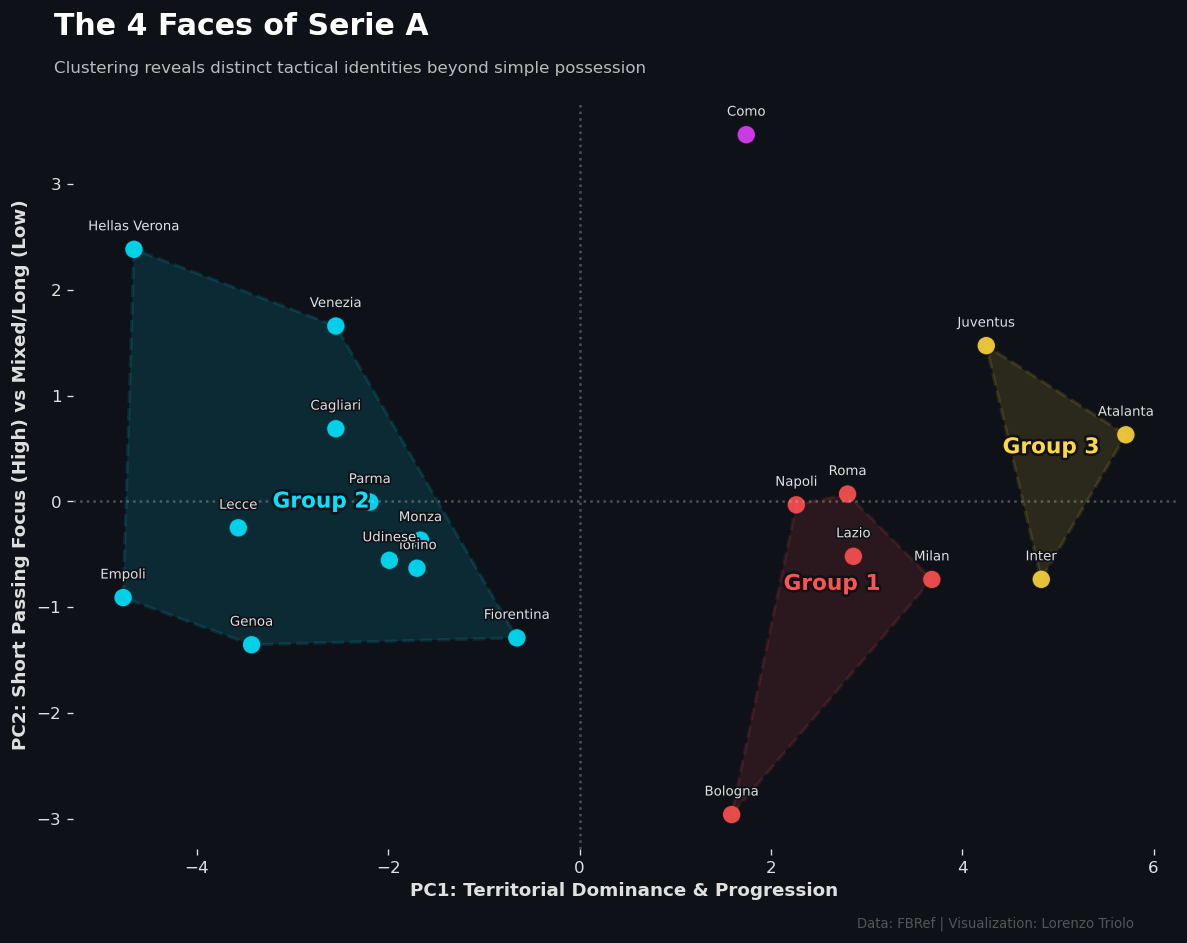

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.spatial import ConvexHull
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.patheffects as path_effects

# --- 1. SETUP STYLE DARK ---
BG_COLOR = '#0e1117'
TEXT_COLOR = '#E0E0E0'
plt.rcParams.update({
    'figure.facecolor': BG_COLOR, 'axes.facecolor': BG_COLOR, 'text.color': TEXT_COLOR,
    'axes.labelcolor': TEXT_COLOR, 'xtick.color': TEXT_COLOR, 'ytick.color': TEXT_COLOR,
    'grid.color': '#333333', 'axes.spines.top': False, 'axes.spines.right': False
})

# --- 2. CALCOLO CLUSTERING (K=4) ---
best_k = 4  # <--- FORZATO A 4 COME RICHIESTO
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init="auto")
kmeans.fit(X_std) 
df["StyleCluster"] = kmeans.labels_

# --- 3. CALCOLO PCA ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)
df["PC1"] = X_pca[:, 0]
df["PC2"] = X_pca[:, 1]

# --- 4. CREAZIONE GRAFICO ---
fig, ax = plt.subplots(figsize=(10, 8), dpi=120)

# Palette Neon a 4 colori (Rosso, Ciano, Giallo, Viola)
cluster_colors = ['#FF5252', '#00E5FF', '#FFD740', '#E040FB'] 

sns.scatterplot(
    data=df, x="PC1", y="PC2", hue="StyleCluster",
    palette=cluster_colors, s=130, alpha=0.9, 
    edgecolor=BG_COLOR, linewidth=1, ax=ax, legend=False
)

# --- DISEGNARE I CONVEX HULLS ---
for i, color in enumerate(cluster_colors):
    points = df[df["StyleCluster"] == i][["PC1", "PC2"]].values
    
    if len(points) > 2:
        hull = ConvexHull(points)
        polygon = plt.Polygon(
            points[hull.vertices], closed=True, facecolor=color, alpha=0.12, # Molto leggero
            edgecolor=color, linewidth=2, linestyle='--'
        )
        ax.add_patch(polygon)
        
        # Etichetta Cluster Numerica (es. "Cluster 1")
        # Se vuoi, puoi sostituire "Clust {i}" con nomi veri tipo "Dominators", "Counter", ecc.
        center = np.mean(points, axis=0)
        ax.text(center[0], center[1], f"Group {i+1}", color=color, 
                fontsize=13, fontweight='bold', ha='center', 
                path_effects=[path_effects.withStroke(linewidth=3, foreground=BG_COLOR)])

# --- ETICHETTE SQUADRE ---
for _, r in df.iterrows():
    ax.text(r["PC1"], r["PC2"]+0.18, r["Squad"], fontsize=8, color=TEXT_COLOR, ha='center', fontweight='medium',
            path_effects=[path_effects.withStroke(linewidth=2, foreground=BG_COLOR)])

# --- TITOLI E CLEANUP ---
# Asse X: PC1 = Dominio territoriale (Toc, Progressione, Ultimo terzo)
ax.set_xlabel("PC1: Territorial Dominance & Progression", fontsize=11, fontweight='bold', color=TEXT_COLOR)

# Asse Y: PC2 = Stile di passaggio (Corto vs Lungo/Medio)
ax.set_ylabel("PC2: Short Passing Focus (High) vs Mixed/Long (Low)", fontsize=11, fontweight='bold', color=TEXT_COLOR)

ax.axhline(0, color=TEXT_COLOR, linestyle=':', alpha=0.3)
ax.axvline(0, color=TEXT_COLOR, linestyle=':', alpha=0.3)

fig.text(0.05, 0.95, "The 4 Faces of Serie A", fontsize=18, fontweight='bold', color='white')
fig.text(0.05, 0.91, "Clustering reveals distinct tactical identities beyond simple possession", fontsize=10, color='#bbbbbb')
fig.text(0.95, 0.02, "Data: FBRef | Visualization: Lorenzo Triolo", ha='right', fontsize=8, color='#555555')

plt.tight_layout(rect=[0, 0.03, 1, 0.90])
plt.show()


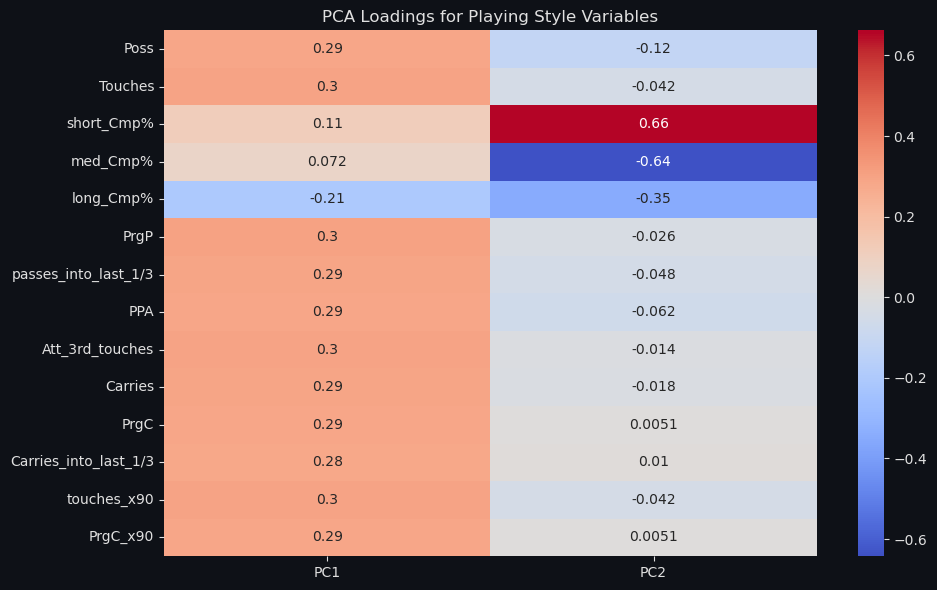

In [11]:
loadings = pd.DataFrame(
    pca.components_.T,
    index=style_vars,
    columns=["PC1", "PC2"]
)
plt.figure(figsize=(10, 6))
sns.heatmap(
    loadings,
    annot=True,
    cmap="coolwarm",
    center=0
)
plt.title("PCA Loadings for Playing Style Variables")
plt.tight_layout()

Dalla heatmap si vede chiaramente che:

- PC1 ha loading positivi e molto simili per quasi tutte le metriche di volume/progressione in possesso: Poss, Touches, PrgP, passes_into_last_1/3, PPA, Att_3rd_touches, Carries, PrgC, Carries_into_last_1/3, touches_x90, PrgC_x90 sono tutti ~0.28–0.30.​

- PC2 invece è dominato dalle percentuali di passaggio: fortemente positivo su short_Cmp% (~0.66) e fortemente negativo su med_Cmp% e long_Cmp% (circa −0.64 e −0.35).

Cluster/Squadre (esempi)/Posizione su PC1–PC2/Interpretazione sintetica dello stile in possesso
- 0 (blu)	Bologna, Napoli, Roma, Lazio, Milan	PC1 medio‑alto, PC2 leggermente negativo	Possesso strutturato: buon volume e progressione, mix equilibrato tra corto e medio/lungo, non estremamente palleggiato ma nemmeno diretto puro.
- 1 (arancione)	Empoli, Genoa, Lecce, Verona, Venezia, Cagliari, Parma, Monza, Udinese, Frosinone, Fiorentina	PC1 negativo, PC2 vicino allo zero (con qualche caso alto)	Squadre con minore volume di possesso e meno presenza costante in alto; stili eterogenei ma in generale meno “dominanti” col pallone, spesso più reattive o dirette
- 2 (verde)	Inter, Atalanta, Juventus	PC1 molto alto, PC2 positivo	Possesso alto e verticale: tante azioni progressive e presenza in terzo offensivo, con buona qualità sul corto anche giocando aggressivi in avanti.
- 3 (rosso)	Como	PC1 alto, PC2 molto alto	Caso unico: grande volume/progressione in possesso combinato con uso marcato di passaggi corti e molto puliti; stile di palleggio estremamente paziente e tecnico rispetto al resto del campionato.

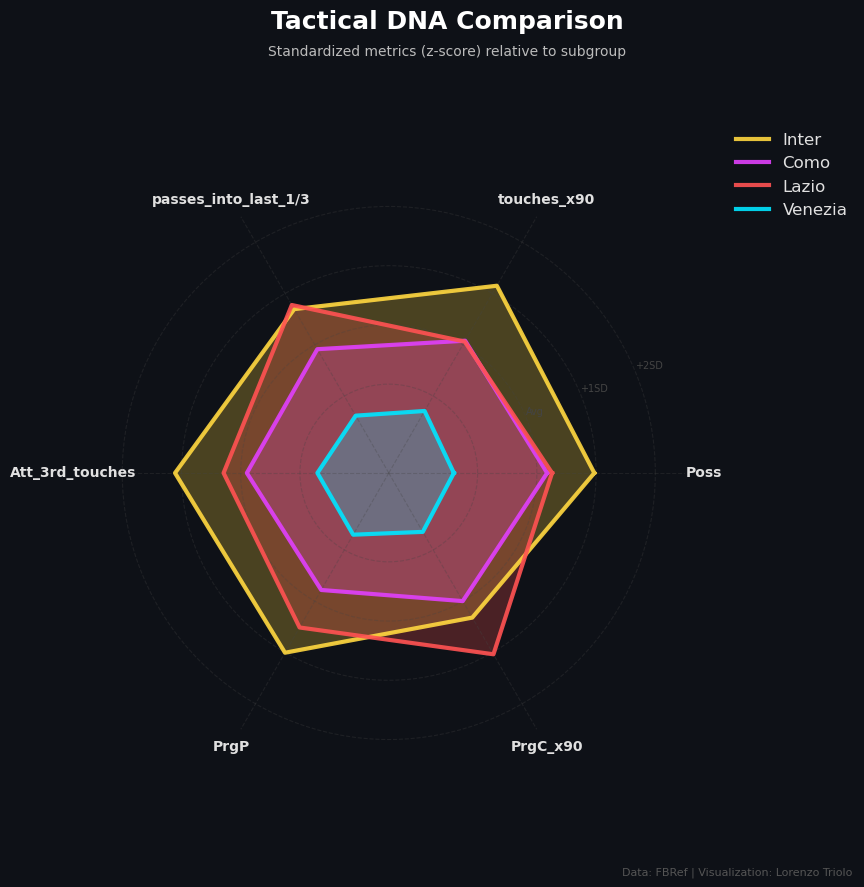

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# --- 1. SETUP STYLE DARK ---
BG_COLOR = '#0e1117'
TEXT_COLOR = '#E0E0E0'
GRID_COLOR = '#444444'

plt.rcParams.update({
    'figure.facecolor': BG_COLOR,
    'axes.facecolor': BG_COLOR,     # Per grafici cartesiani (qui non serve, ma lo mettiamo)
    'text.color': TEXT_COLOR,
    'axes.labelcolor': TEXT_COLOR,
    'xtick.color': TEXT_COLOR,
    'ytick.color': TEXT_COLOR,
    'grid.color': GRID_COLOR,
})

# --- 2. DATI (Assumiamo che 'df' esista già) ---
teams_for_radar = ["Inter", "Como", "Lazio", "Venezia"]
radar_vars = ["Poss", "touches_x90", "passes_into_last_1/3", "Att_3rd_touches", "PrgP", "PrgC_x90"]

# Creazione DF Radar
df_radar = df[df["Squad"].isin(teams_for_radar)].set_index("Squad")[radar_vars]

# Z-score (Importante: calcolalo su TUTTO il df originale per avere una media reale, non solo su queste 4)
# Oppure se vuoi confrontare solo queste 4 tra loro, lascia così.
# Qui lo faccio sulle 4 come da tuo codice originale:
df_radar_z = (df_radar - df_radar.mean()) / df_radar.std()

# --- 3. SETUP RADAR ---
N = len(radar_vars)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1] # Chiudere il cerchio

# Palette Neon coerente con gli altri grafici (Clusters)
colors = {
    "Inter": "#FFD740",   # Giallo (Dominators / Group 3)
    "Como": "#E040FB",    # Viola (Outlier / Group 4)
    "Lazio": "#FF5252",   # Rosso (Possession / Group 1)
    "Venezia": "#00E5FF", # Ciano (Direct / Group 2)
}

# --- 4. PLOT ---
fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(polar=True))

# Hack per lo sfondo del grafico polare (che è 'patch')
ax.set_facecolor(BG_COLOR)

for team in teams_for_radar:
    values = df_radar_z.loc[team].tolist()
    values += values[:1]
    
    # Linea Neon spessa
    ax.plot(angles, values, color=colors[team], linewidth=3, label=team, alpha=0.9)
    # Riempimento leggero
    ax.fill(angles, values, color=colors[team], alpha=0.25)

# --- 5. STYLING ASSI ---
# Etichette variabili (Asse X polare)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(radar_vars, fontsize=10, fontweight="bold", color=TEXT_COLOR)

# Etichette valori (Asse Y radiale) -> Le togliamo o le facciamo minimal
ax.set_ylim(-2.5, 2.5)
ax.set_yticks([-1, 0, 1, 2])
ax.set_yticklabels(["", "Avg", "+1SD", "+2SD"], fontsize=7, color=GRID_COLOR) # Minimal labels
ax.tick_params(axis='y', pad=25) # Sposta le label radiali per non sovrapporsi

# Griglia personalizzata
ax.grid(color=GRID_COLOR, alpha=0.3, linestyle='--')

# Rimuovere bordo esterno brutto
ax.spines['polar'].set_visible(False)

# Titolo
fig.text(0.5, 0.96, "Tactical DNA Comparison", ha='center', fontsize=18, fontweight='bold', color='white')
fig.text(0.5, 0.93, "Standardized metrics (z-score) relative to subgroup", ha='center', fontsize=10, color='#bbbbbb')

# Legenda pulita
leg = ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), frameon=False, fontsize=12)
for text in leg.get_texts():
    text.set_color(TEXT_COLOR)

# Footer
fig.text(0.95, 0.02, "Data: FBRef | Visualization: Lorenzo Triolo", ha='right', fontsize=8, color='#555555')

plt.tight_layout()
plt.show()


## Cluster defensive

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


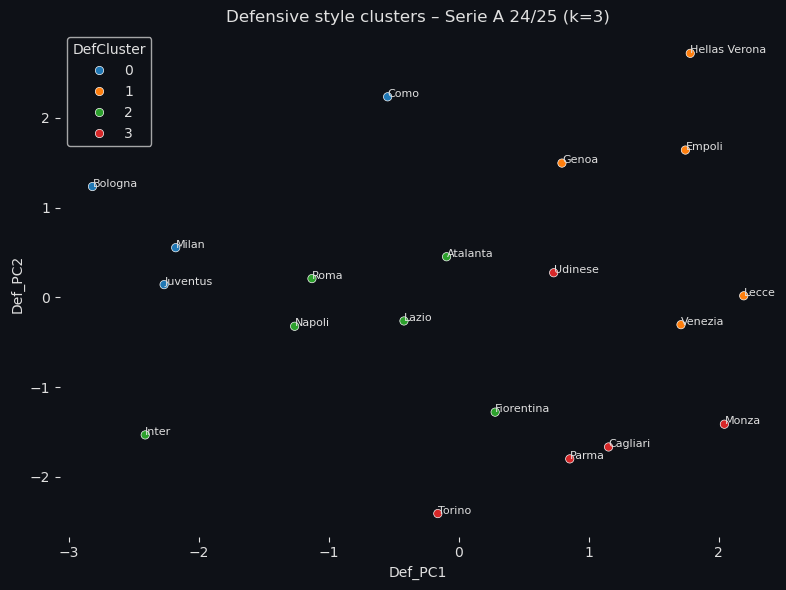

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as snsM

# 1) Selezione variabili difensive
defensive_vars = [
    "TKlW%",
    "Int",
    "Def_3rd_tackles",
    "Mid_3rd_tackles",
    "Att_3rd_tackles",
    "Def_action_toGoal",
    "xGA_90"
]

X_def = df[defensive_vars].copy()

# 2) Standardizzazione
scaler_def = StandardScaler()
X_def_std = scaler_def.fit_transform(X_def)

# 3) KMeans con k = 3
kmeans_def = KMeans(n_clusters=4, random_state=42, n_init="auto")
df["DefCluster"] = kmeans_def.fit_predict(X_def_std)

# 4) PCA a 2 componenti per visualizzare i cluster difensivi
pca_def = PCA(n_components=2)
X_def_pca = pca_def.fit_transform(X_def_std)
df["Def_PC1"] = X_def_pca[:, 0]
df["Def_PC2"] = X_def_pca[:, 1]

# 5) Scatterplot 2D con etichette squadra
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="Def_PC1",
    y="Def_PC2",
    hue="DefCluster",
    palette="tab10"
)

for _, r in df.iterrows():
    plt.text(r["Def_PC1"], r["Def_PC2"], r["Squad"], fontsize=8)

plt.title("Defensive style clusters – Serie A 24/25 (k=3)")
plt.tight_layout()
plt.show()


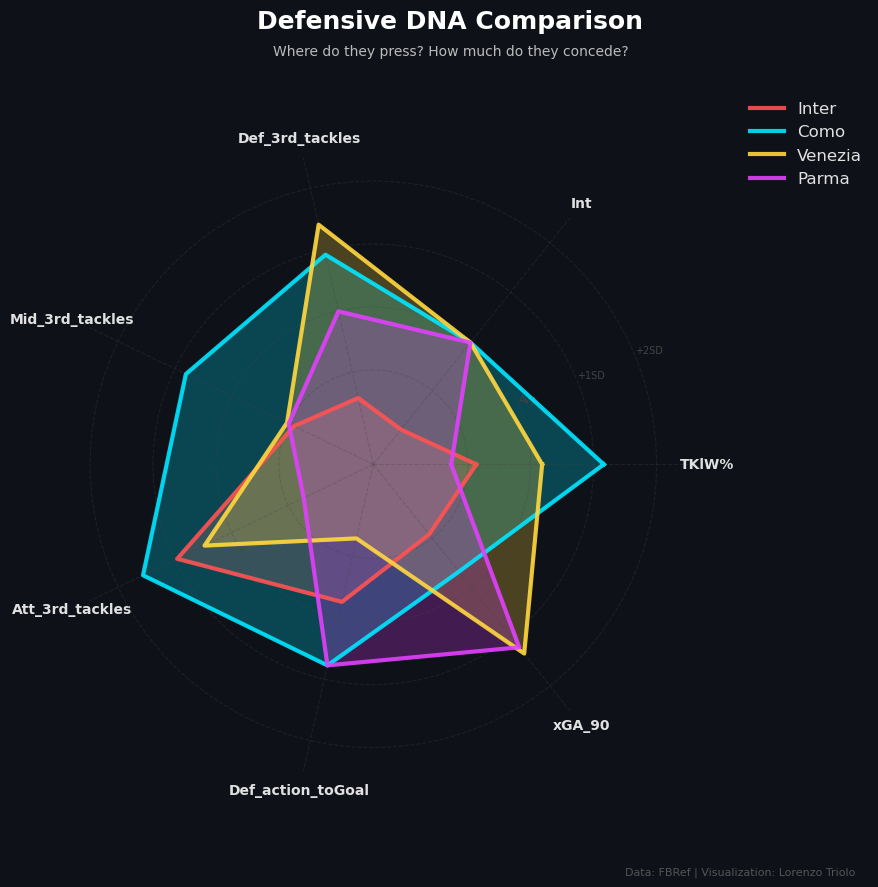

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# --- 1. SETUP STYLE DARK ---
BG_COLOR = '#0e1117'
TEXT_COLOR = '#E0E0E0'
GRID_COLOR = '#444444'

plt.rcParams.update({
    'figure.facecolor': BG_COLOR,
    'axes.facecolor': BG_COLOR,
    'text.color': TEXT_COLOR,
    'axes.labelcolor': TEXT_COLOR,
    'xtick.color': TEXT_COLOR,
    'ytick.color': TEXT_COLOR,
    'grid.color': GRID_COLOR,
})

# --- 2. SELEZIONE SQUADRE E VARIABILI ---
# Sostituisci qui i nomi delle squadre rappresentative per ogni cluster
# Esempio: Cluster 0 -> Empoli (Basso), Cluster 1 -> Atalanta (Alto), Cluster 2 -> Inter (Elite)
teams_for_radar = ["Inter", "Como", "Venezia", "Parma"]  

# Le stesse variabili usate per il clustering
radar_vars = [
    "TKlW%",
    "Int",
    "Def_3rd_tackles",
    "Mid_3rd_tackles",
    "Att_3rd_tackles",
    "Def_action_toGoal",
    "xGA_90" 
]

# Nota su xGA_90:
# Nel radar, di solito "più esterno" = "meglio/più intenso".
# Ma xGA alto è MALE.
# Opzione A: Lasciarlo così (Chi ha tanto xGA ha la punta esterna -> "Difesa colabrodo")
# Opzione B: Invertire il segno o usare (Max - xGA) per mostrare "Solidità".
# QUI USO I DATI GREZZI (Opzione A), ma ricorda: punta esterna su xGA = Pericolo!

# Creazione DF Radar
df_radar = df[df["Squad"].isin(teams_for_radar)].set_index("Squad")[radar_vars]

# Z-score su tutto il dataset per confronto reale
df_radar_z = (df_radar - df[radar_vars].mean()) / df[radar_vars].std()

# --- 3. SETUP RADAR ---
N = len(radar_vars)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1] # Chiudere il cerchio

# Palette Neon distinta per i cluster difensivi
colors = {
    teams_for_radar[0]: "#FF5252",   # Rosso
    teams_for_radar[1]: "#00E5FF",   # Ciano
    teams_for_radar[2]: "#FFD740",   # Giallo
    teams_for_radar[3]: "#E040FB",   # Viola
}

# --- 4. PLOT ---
fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(polar=True))
ax.set_facecolor(BG_COLOR)

for team in teams_for_radar:
    values = df_radar_z.loc[team].tolist()
    values += values[:1]
    
    # Linea Neon spessa
    ax.plot(angles, values, color=colors[team], linewidth=3, label=team, alpha=0.9)
    # Riempimento leggero
    ax.fill(angles, values, color=colors[team], alpha=0.25)

# --- 5. STYLING ASSI ---
# Label Variabili
ax.set_xticks(angles[:-1])
ax.set_xticklabels(radar_vars, fontsize=10, fontweight="bold", color=TEXT_COLOR)

# Label Valori (Z-score)
ax.set_ylim(-2.5, 2.5)
ax.set_yticks([-1, 0, 1, 2])
ax.set_yticklabels(["", "Avg", "+1SD", "+2SD"], fontsize=7, color=GRID_COLOR)
ax.tick_params(axis='y', pad=25) 

# Griglia e pulizia
ax.grid(color=GRID_COLOR, alpha=0.3, linestyle='--')
ax.spines['polar'].set_visible(False)

# Titolo
fig.text(0.5, 0.96, "Defensive DNA Comparison", ha='center', fontsize=18, fontweight='bold', color='white')
fig.text(0.5, 0.93, "Where do they press? How much do they concede?", ha='center', fontsize=10, color='#bbbbbb')

# Legenda
leg = ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), frameon=False, fontsize=12)
for text in leg.get_texts():
    text.set_color(TEXT_COLOR)

# Footer
fig.text(0.95, 0.02, "Data: FBRef | Visualization: Lorenzo Triolo", ha='right', fontsize=8, color='#555555')

plt.tight_layout()
plt.show()


## Offensive Profile Heatmap

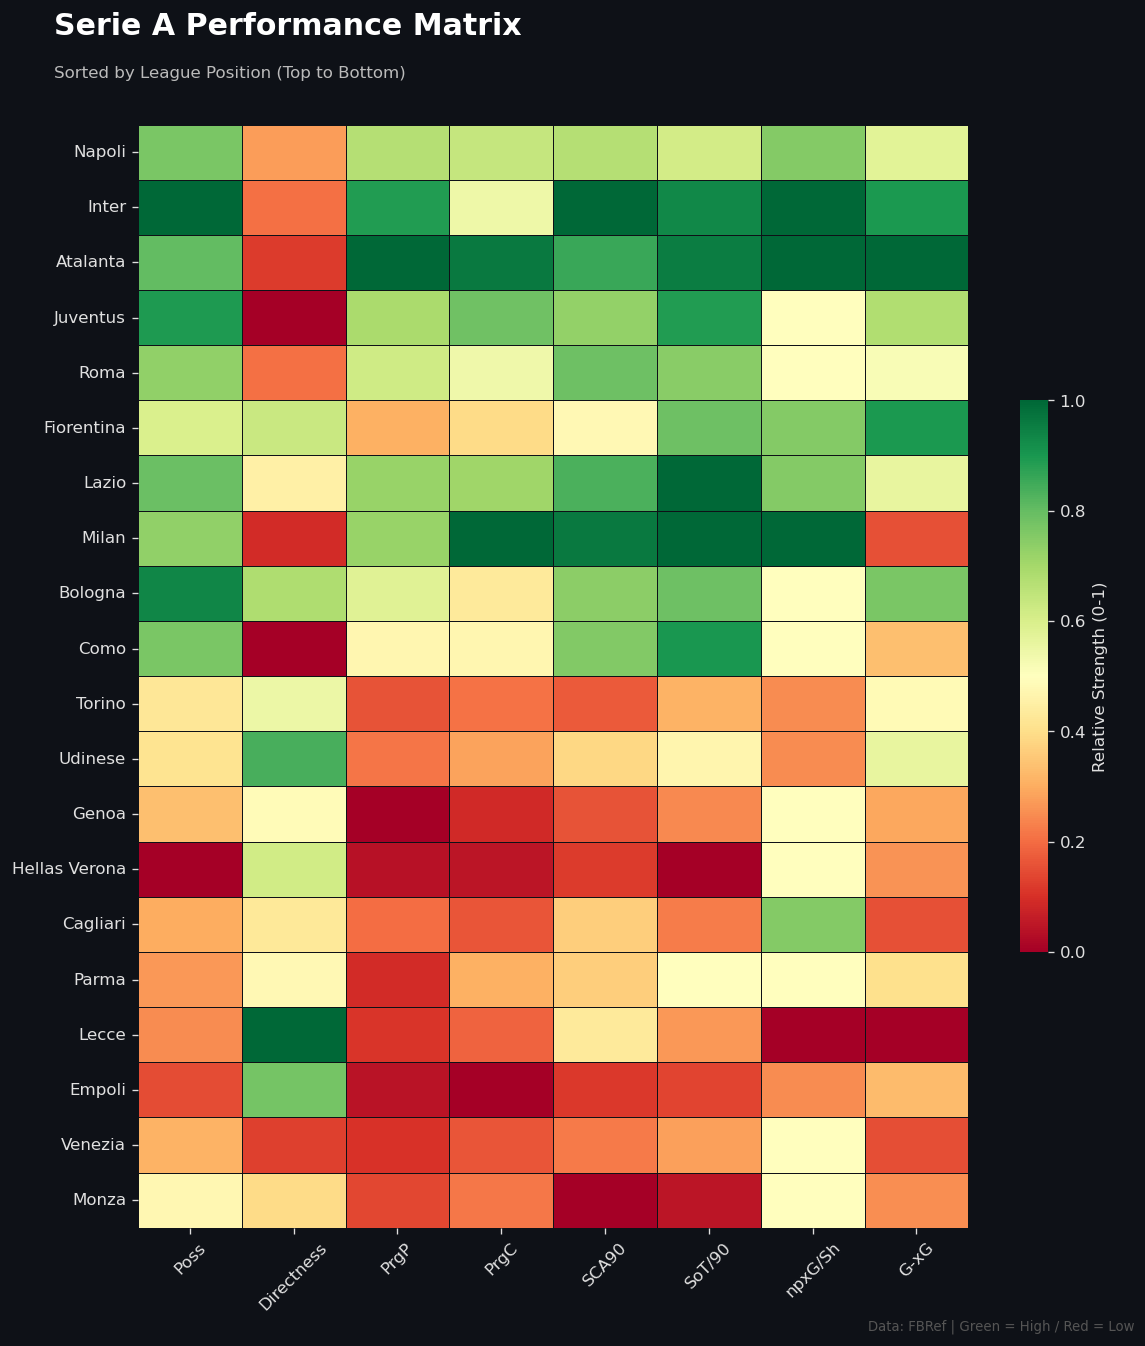

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- 1. SETUP STYLE DARK ---
BG_COLOR = '#0e1117'
TEXT_COLOR = '#E0E0E0'
plt.rcParams.update({
    'figure.facecolor': BG_COLOR, 'axes.facecolor': BG_COLOR, 'text.color': TEXT_COLOR,
    'axes.labelcolor': TEXT_COLOR, 'xtick.color': TEXT_COLOR, 'ytick.color': TEXT_COLOR
})

# --- 2. DATI ---
heat_vars = ["Poss", "Directness", "PrgP", "PrgC", "SCA90", "SoT/90", "npxG/Sh", "G-xG"]

# Assicuriamoci che Directness esista
if "Directness" not in df.columns:
    df["Directness"] = df["long_Cmp%"] 

# Ordiniamo le squadre! (Fondamentale per la leggibilità)
# Opzione A: Ordina per Punti (Pts) -> Mostra il gradiente dalla capolista all'ultima
# Opzione B: Ordina per Cluster -> Raggruppa stili simili
df_sorted = df.sort_values("Pts", ascending=False) 

heat_data = df_sorted.set_index("Squad")[heat_vars]

# Normalizzazione Min-Max (0-1)
heat_data_norm = (heat_data - heat_data.min()) / (heat_data.max() - heat_data.min())

# --- 3. PLOT ---
fig, ax = plt.subplots(figsize=(10, 12), dpi=120) # Più alta che larga per leggere i nomi

sns.heatmap(
    heat_data_norm, 
    cmap="RdYlGn",       # O prova "mako", "flare", "vlag" per effetti diversi
    annot=False,         # Niente numeri, solo visual
    linewidths=0.5,      # Linee sottili tra celle
    linecolor=BG_COLOR,  # Colore linee = sfondo (effetto "taglio")
    cbar_kws={"shrink": 0.5, "label": "Relative Strength (0-1)"}, # Barra laterale più piccola
    square=False,        # Celle rettangolari
    ax=ax
)

# --- 4. STYLING ---
# Assi
ax.set_xlabel("")
ax.set_ylabel("")
ax.tick_params(axis='x', rotation=45) # Ruota label in basso
ax.tick_params(axis='y', labelsize=10)

# Titolo
fig.text(0.05, 0.95, "Serie A Performance Matrix", fontsize=18, fontweight='bold', color='white')
fig.text(0.05, 0.92, "Sorted by League Position (Top to Bottom)", fontsize=10, color='#bbbbbb')

# Footer
fig.text(0.95, 0.05, "Data: FBRef | Green = High / Red = Low", ha='right', fontsize=8, color='#555555')

plt.tight_layout(rect=[0, 0.05, 1, 0.90])
plt.show()


## Presence in attacking 3rd vs How Dangerous a team is

C:\Users\HP\AppData\Local\Temp\ipykernel_21412\4081844644.py:53: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = mpl.cm.get_cmap("plasma")


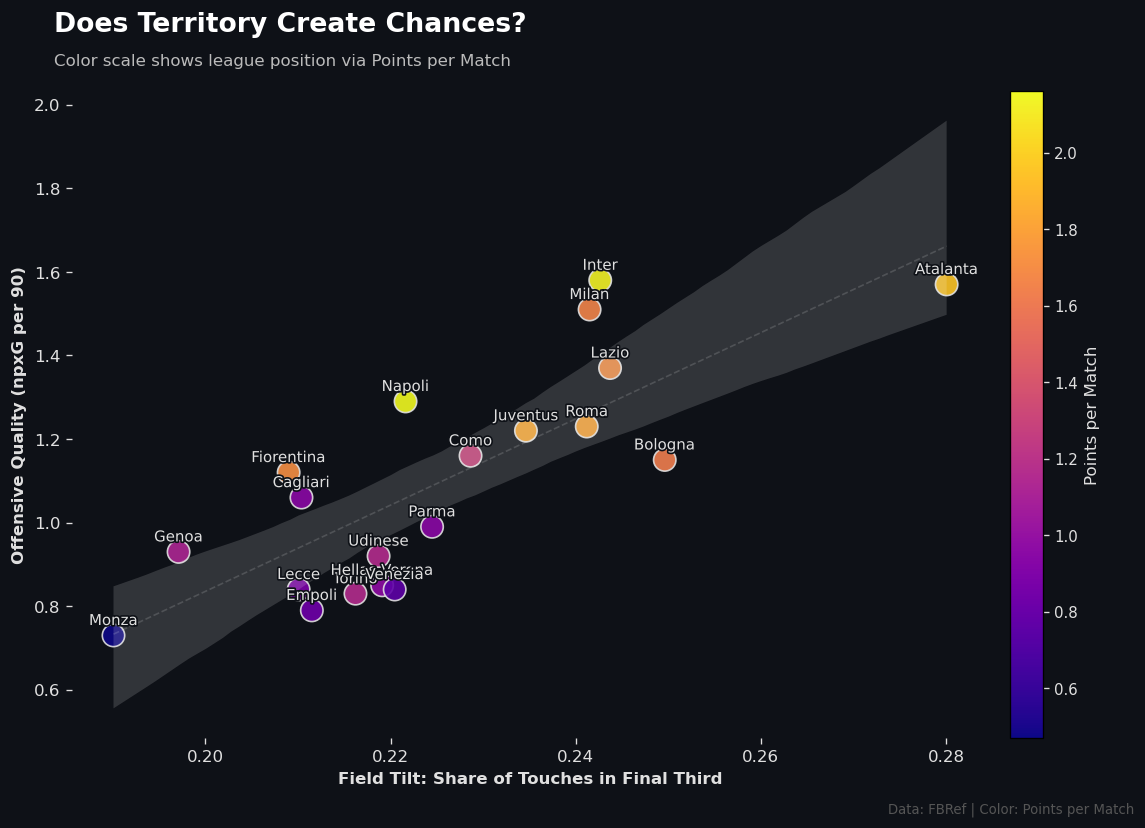

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patheffects as path_effects
import matplotlib as mpl

BG_COLOR = '#0e1117'
TEXT_COLOR = '#E0E0E0'
GRID_COLOR = '#444444'

plt.rcParams.update({
    'figure.facecolor': BG_COLOR, 'axes.facecolor': BG_COLOR, 'text.color': TEXT_COLOR,
    'axes.labelcolor': TEXT_COLOR, 'xtick.color': TEXT_COLOR, 'ytick.color': TEXT_COLOR,
    'grid.color': GRID_COLOR, 'axes.spines.top': False, 'axes.spines.right': False
})

if "Att3rd_share" not in df.columns:
    df["Att3rd_share"] = df["Att_3rd_touches"] / df["Touches"]

fig, ax = plt.subplots(figsize=(10, 7), dpi=120)

# Scatter: colore = Pts/MP, dimensione fissa
sc = sns.scatterplot(
    data=df,
    x="Att3rd_share",
    y="npxG_90",
    hue="Pts/MP",
    palette="plasma",
    s=180,
    alpha=0.9,
    edgecolor=TEXT_COLOR,
    linewidth=1,
    ax=ax,
    legend=False   # niente legenda standard
)

# Trendline opzionale
sns.regplot(
    data=df, x="Att3rd_share", y="npxG_90", scatter=False,
    ax=ax, color='white',
    line_kws={'alpha':0.15, 'linewidth':1, 'linestyle':'--'}
)

# Etichette squadre
for _, r in df.iterrows():
    ax.text(
        r["Att3rd_share"], r["npxG_90"]+0.025, r["Squad"],
        fontsize=9, color=TEXT_COLOR, ha='center',
        path_effects=[path_effects.withStroke(linewidth=2, foreground=BG_COLOR)]
    )

# --- COLORBAR CONTINUA PER Pts/MP ---
norm = mpl.colors.Normalize(vmin=df["Pts/MP"].min(), vmax=df["Pts/MP"].max())
cmap = mpl.cm.get_cmap("plasma")
sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])  # richiesto da matplotlib

cbar = fig.colorbar(sm, ax=ax, pad=0.02)
cbar.set_label("Points per Match", color=TEXT_COLOR)
cbar.ax.yaxis.set_tick_params(color=TEXT_COLOR)
plt.setp(cbar.ax.get_yticklabels(), color=TEXT_COLOR, fontsize=9)

# Assi & titoli
ax.set_xlabel("Field Tilt: Share of Touches in Final Third", fontsize=10, fontweight='bold')
ax.set_ylabel("Offensive Quality (npxG per 90)", fontsize=10, fontweight='bold')

fig.text(0.05, 0.95, "Does Territory Create Chances?", fontsize=16, fontweight='bold', color='white')
fig.text(0.05, 0.91, "Color scale shows league position via Points per Match", fontsize=10, color='#bbbbbb')
fig.text(0.95, 0.02, "Data: FBRef | Color: Points per Match", ha='right', fontsize=8, color='#555555')

plt.tight_layout(rect=[0, 0.03, 1, 0.90])
plt.show()


## Possession levels by league position

C:\Users\HP\AppData\Local\Temp\ipykernel_21412\802826156.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('plasma') # o 'inferno' o 'viridis'
C:\Users\HP\AppData\Local\Temp\ipykernel_21412\802826156.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


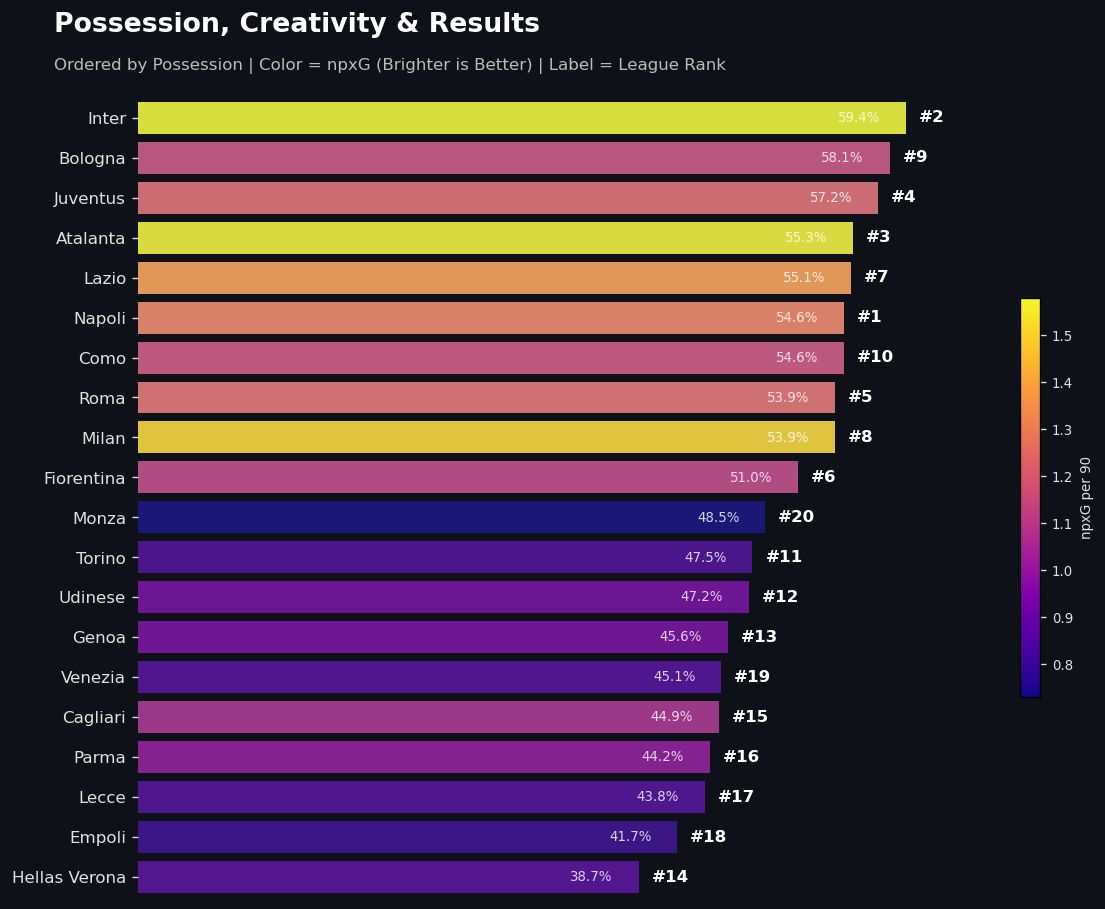

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

# --- 1. SETUP ---
BG_COLOR = '#0e1117'
TEXT_COLOR = '#E0E0E0'
plt.rcParams.update({'figure.facecolor': BG_COLOR, 'axes.facecolor': BG_COLOR, 'text.color': TEXT_COLOR, 
                     'axes.spines.top': False, 'axes.spines.right': False, 'axes.spines.bottom': False, 'axes.spines.left': False})

# --- 2. DATI E ORDINAMENTO ---
# Ordiniamo per POSSESSO (dal più alto al più basso)
df_sorted = df.sort_values("Poss", ascending=False).reset_index(drop=True)

# --- 3. MAPPA COLORE (npxG_90) ---
# Normalizziamo npxG_90 per il colore
# (Giallo/Arancio = Crea tanto, Viola/Scuro = Crea poco)
npxg_values = df_sorted['npxG_90'].values
norm = plt.Normalize(npxg_values.min(), npxg_values.max())
cmap = plt.cm.get_cmap('plasma') # o 'inferno' o 'viridis'
colors = [cmap(norm(val)) for val in npxg_values]

# --- 4. PLOT ---
fig, ax = plt.subplots(figsize=(10, 8), dpi=120)

bars = sns.barplot(
    data=df_sorted,
    x="Poss",
    y="Squad",
    palette=colors,       # Colore basato su xG
    order=df_sorted["Squad"], 
    ax=ax
)

# --- 5. ETICHETTE (Il tocco magico) ---
for i, bar in enumerate(bars.patches):
    width = bar.get_width()
    rank = df_sorted["Rk"].iloc[i] # Prendiamo la posizione in classifica
    
    # Scriviamo la Posizione (Rk) ALLA FINE della barra
    ax.text(
        width + 1,           # Un po' a destra della barra
        bar.get_y() + bar.get_height()/2, 
        f"#{int(rank)}",     # Es. "#1", "#5"
        va='center', 
        ha='left', 
        color='white',       
        fontweight='bold', 
        fontsize=10
    )
    
    # Scriviamo il Possesso DENTRO la barra (opzionale, per pulizia)
    ax.text(
        width - 2, 
        bar.get_y() + bar.get_height()/2, 
        f"{width:.1f}%", 
        va='center', 
        ha='right', 
        color='white',
        fontsize=8,
        alpha=0.8
    )

# --- 6. CLEANUP ---
ax.set_xticks([])
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_xlim(0, df_sorted["Poss"].max() + 8) # Spazio per l'etichetta rank

# Titolo che spiega tutto
fig.text(0.05, 0.95, "Possession, Creativity & Results", fontsize=16, fontweight='bold', color='white')
fig.text(0.05, 0.91, "Ordered by Possession | Color = npxG (Brighter is Better) | Label = League Rank", fontsize=10, color='#bbbbbb')

# Colorbar piccola per spiegare il colore (npxG)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, shrink=0.5, aspect=20, pad=0.01)
cbar.set_label("npxG per 90", color=TEXT_COLOR, fontsize=8)
cbar.ax.yaxis.set_tick_params(color=TEXT_COLOR)
plt.setp(cbar.ax.get_yticklabels(), color=TEXT_COLOR, fontsize=8)

plt.tight_layout(rect=[0, 0.03, 1, 0.90])
plt.show()


## Directness and npXG

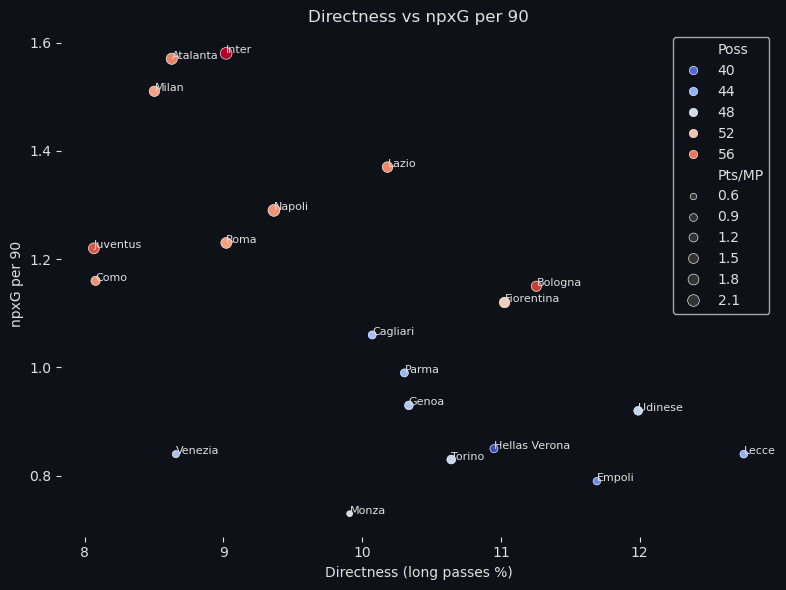

In [20]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="long_Cmp%",
    y="npxG_90",
    size="Pts/MP",
    hue="Poss",
    palette="coolwarm",
    ax=ax
)
for _, r in df.iterrows():
    ax.text(r["long_Cmp%"], r["npxG_90"], r["Squad"], fontsize=8)
ax.set_xlabel("Directness (long passes %)")
ax.set_ylabel("npxG per 90")
ax.set_title("Directness vs npxG per 90")
plt.tight_layout()

## Entry vs Touches (by shot quality)

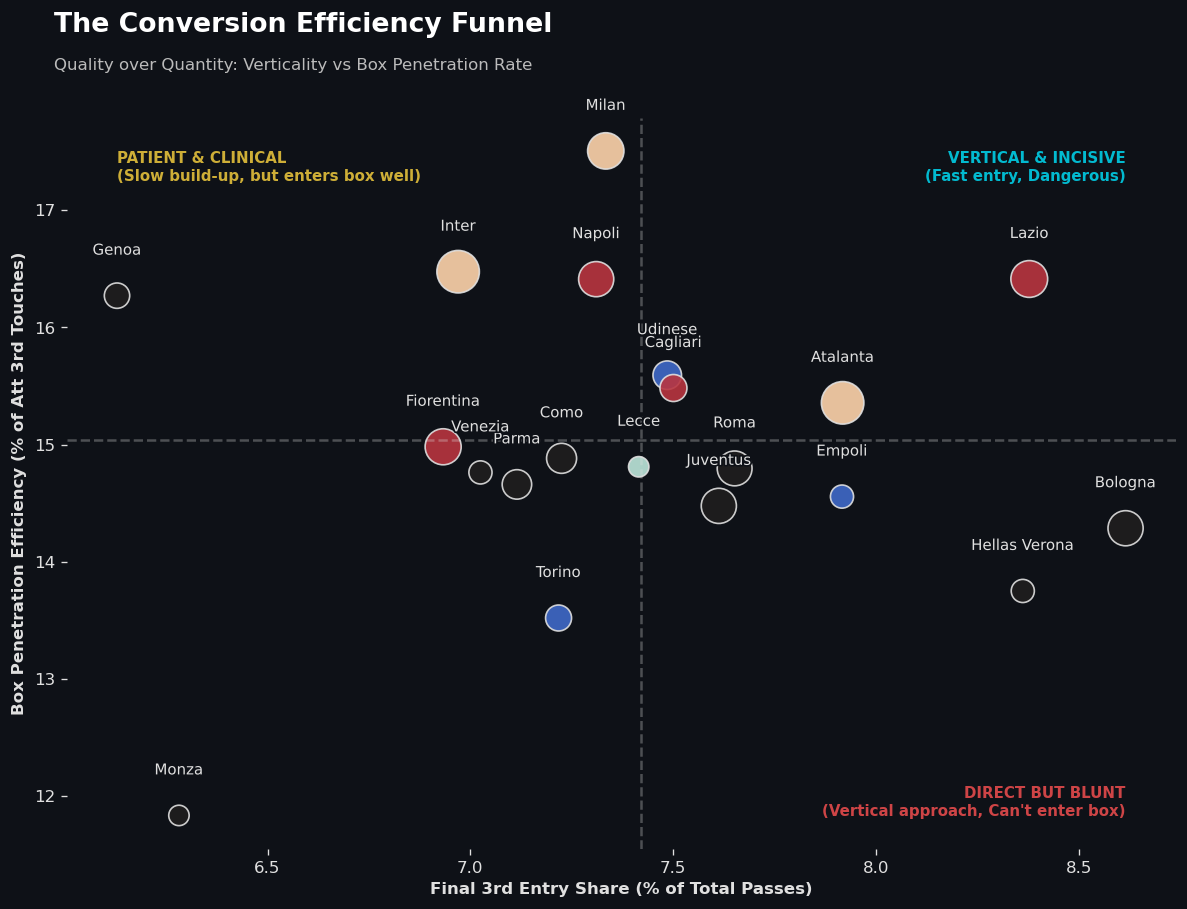

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patheffects as path_effects

# --- 0. NORMALIZZAZIONE VARIABILI (NUOVO) ---
# Efficienza di Entrata: Quanti passaggi totali servono per farne uno nella trequarti?
# (Più è alto, più sei verticale/diretto)
if "Final3_Entry_Share" not in df.columns:
    df["Final3_Entry_Share"] = (df["passes_into_last_1/3"] / df["Cmp"]) * 100

# Efficienza in Area: Ogni volta che tocchi palla sulla trequarti, quante volte entri in area?
# (Più è alto, più sei incisivo)
if "Box_Touch_Share" not in df.columns:
    df["Box_Touch_Share"] = (df["Att Pen"] / df["Att_3rd_touches"]) * 100

# --- SETUP ---
BG_COLOR = '#0e1117'
TEXT_COLOR = '#E0E0E0'
plt.rcParams.update({'figure.facecolor': BG_COLOR, 'axes.facecolor': BG_COLOR, 'text.color': TEXT_COLOR,
                     'axes.spines.top': False, 'axes.spines.right': False})

# --- PLOT 1: EFFICIENCY FUNNEL ---
fig, ax = plt.subplots(figsize=(10, 8), dpi=120)

# Nuove Variabili Normalizzate
x_var = "Final3_Entry_Share"
y_var = "Box_Touch_Share" 

sns.scatterplot(
    data=df, x=x_var, y=y_var,
    hue="npxG/Sh", palette="icefire", size="Gls_x90", sizes=(150, 650), # Size un po' più grandi
    alpha=0.9, edgecolor=TEXT_COLOR, linewidth=1, ax=ax, legend=False
)

# Quadranti medi
ax.axvline(df[x_var].mean(), color=TEXT_COLOR, linestyle='--', alpha=0.3)
ax.axhline(df[y_var].mean(), color=TEXT_COLOR, linestyle='--', alpha=0.3)

# Etichette
for _, r in df.iterrows():
    # Piccolo offset per non coprire il punto
    ax.text(r[x_var], r[y_var] + (df[y_var].max()*0.02), r["Squad"], 
            fontsize=9, color=TEXT_COLOR, ha='center',
            path_effects=[path_effects.withStroke(linewidth=2, foreground=BG_COLOR)])

# Annotazioni Quadranti (Aggiornate al significato delle nuove variabili)
ax.text(df[x_var].max(), df[y_var].min(), "DIRECT BUT BLUNT\n(Vertical approach, Can't enter box)", 
        color='#FF5252', ha='right', fontsize=9, fontweight='bold', alpha=0.8)

ax.text(df[x_var].max(), df[y_var].max(), "VERTICAL & INCISIVE\n(Fast entry, Dangerous)", 
        color='#00E5FF', ha='right', va='top', fontsize=9, fontweight='bold', alpha=0.8)

ax.text(df[x_var].min(), df[y_var].max(), "PATIENT & CLINICAL\n(Slow build-up, but enters box well)", 
        color='#FFD740', ha='left', va='top', fontsize=9, fontweight='bold', alpha=0.8)

ax.set_xlabel("Final 3rd Entry Share (% of Total Passes)", fontweight='bold')
ax.set_ylabel("Box Penetration Efficiency (% of Att 3rd Touches)", fontweight='bold')

fig.text(0.05, 0.95, "The Conversion Efficiency Funnel", fontsize=16, fontweight='bold', color='white')
fig.text(0.05, 0.91, "Quality over Quantity: Verticality vs Box Penetration Rate", fontsize=10, color='#bbbbbb')

plt.tight_layout(rect=[0, 0.03, 1, 0.90])
plt.show()


## Pass VS Carry by Possession

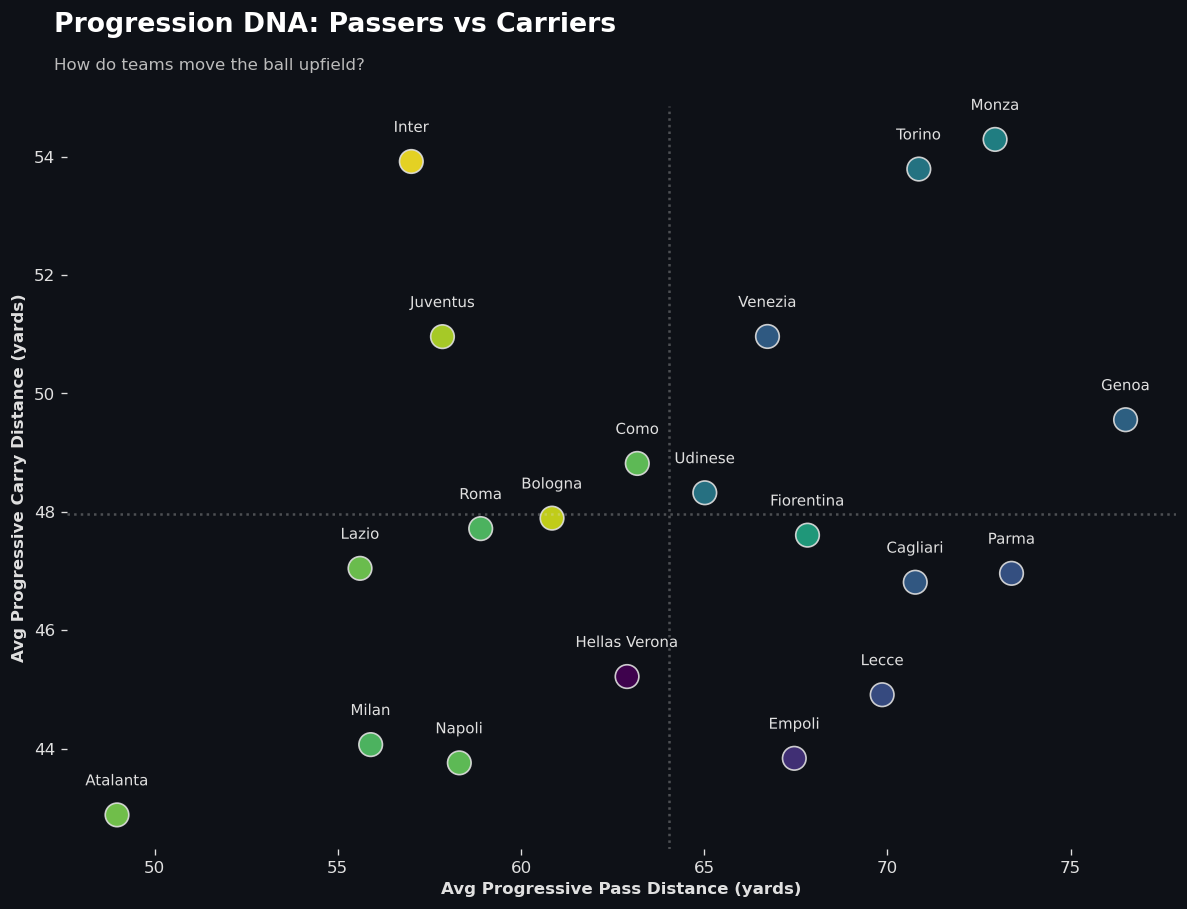

In [22]:
# --- PLOT 2: PASS VS CARRY ---
fig, ax = plt.subplots(figsize=(10, 8), dpi=120)

# Variabili: X=Distanza Passaggi, Y=Distanza Conduzione
x_var = "PrgDistPass_avg" # O "PrgP" se vuoi volume
y_var = "PrgDistCarry_avg" # O "PrgC" se vuoi volume

sns.scatterplot(
    data=df, x=x_var, y=y_var,
    hue="Poss", palette="viridis", s=200, # Colore = Possesso
    alpha=0.9, edgecolor=TEXT_COLOR, linewidth=1, ax=ax, legend=False
)

# Linea diagonale (Y=X) per vedere lo sbilanciamento (se le scale sono simili)
# Se le scale sono diverse, meglio usare le medie come assi cartesiani
ax.axvline(df[x_var].mean(), color=TEXT_COLOR, linestyle=':', alpha=0.3)
ax.axhline(df[y_var].mean(), color=TEXT_COLOR, linestyle=':', alpha=0.3)

# Etichette
for _, r in df.iterrows():
    ax.text(r[x_var], r[y_var]+0.5, r["Squad"], fontsize=9, color=TEXT_COLOR, ha='center',
            path_effects=[path_effects.withStroke(linewidth=2, foreground=BG_COLOR)])

ax.set_xlabel("Avg Progressive Pass Distance (yards)", fontweight='bold')
ax.set_ylabel("Avg Progressive Carry Distance (yards)", fontweight='bold')
fig.text(0.05, 0.95, "Progression DNA: Passers vs Carriers", fontsize=16, fontweight='bold', color='white')
fig.text(0.05, 0.91, "How do teams move the ball upfield?", fontsize=10, color='#bbbbbb')

plt.tight_layout(rect=[0, 0.03, 1, 0.90])
plt.show()


## Normalized Aggression Index

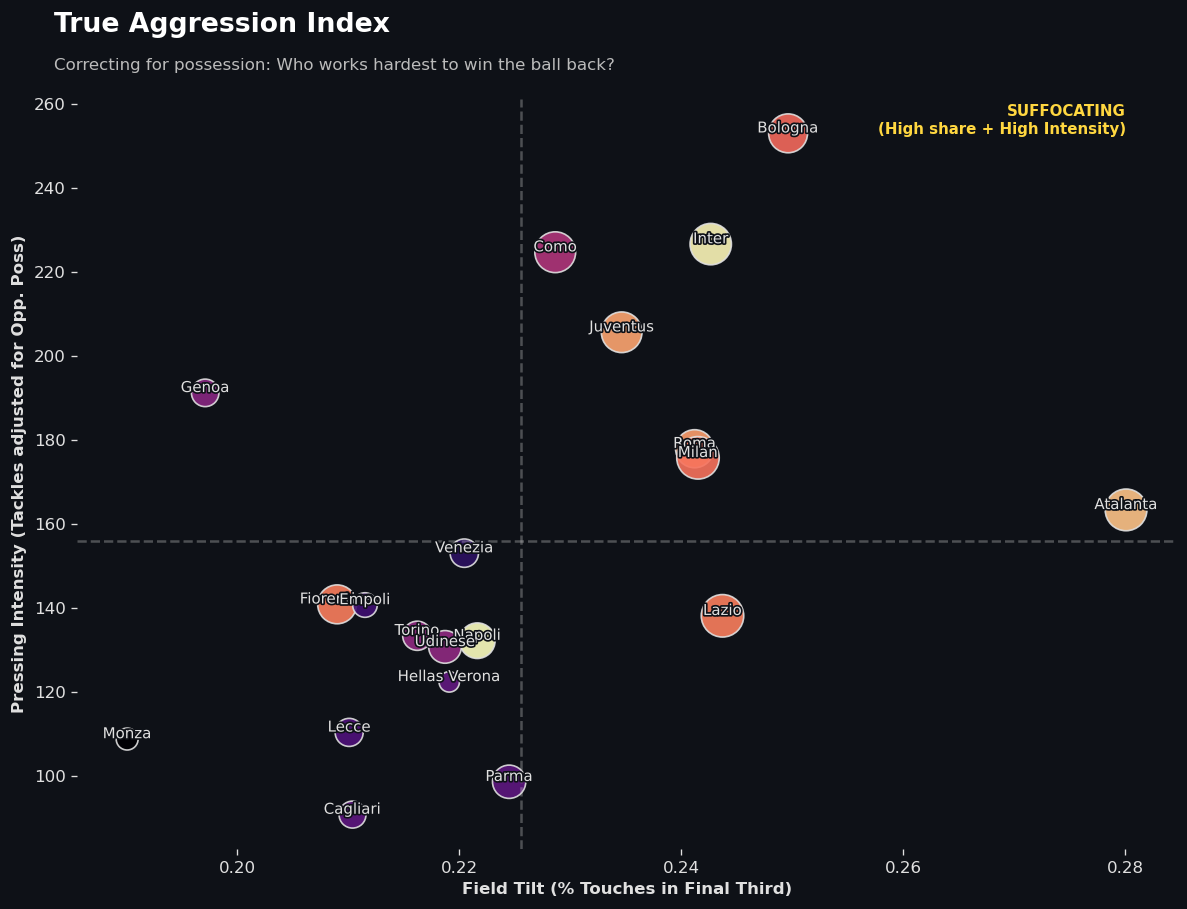

In [23]:
# --- PLOT 3: ADJUSTED PRESSING ---
fig, ax = plt.subplots(figsize=(10, 8), dpi=120)

# 1. Creiamo X (Field Tilt - quanto stiamo su)
if "Att3rd_share" not in df.columns:
    df["Att3rd_share"] = df["Att_3rd_touches"] / df["Touches"]

# 2. Creiamo Y (Pressing Intensity Adjusted)
# Logica: Tackle fatti / % di tempo che passiamo a difendere (1 - Poss/100)
# Moltiplichiamo per una costante (es. 50) per riportare i numeri su una scala leggibile simile a "tackle per partita"
df["Press_Intensity_Adj"] = df["Att_3rd_tackles"] / (1 - (df["Poss"]/100)) 

x_var = "Att3rd_share"
y_var = "Press_Intensity_Adj"

sns.scatterplot(
    data=df, x=x_var, y=y_var,
    hue="Pts/MP", palette="magma", size="SoT/90", sizes=(150, 650), 
    alpha=0.9, edgecolor=TEXT_COLOR, linewidth=1, ax=ax, legend=False
)

# Medie
ax.axvline(df[x_var].mean(), color=TEXT_COLOR, linestyle='--', alpha=0.3)
ax.axhline(df[y_var].mean(), color=TEXT_COLOR, linestyle='--', alpha=0.3)

# Etichette
for _, r in df.iterrows():
    ax.text(r[x_var], r[y_var]+0.2, r["Squad"], fontsize=9, color=TEXT_COLOR, ha='center',
            path_effects=[path_effects.withStroke(linewidth=2, foreground=BG_COLOR)])

# Annotazioni
ax.text(df[x_var].max(), df[y_var].max(), "SUFFOCATING\n(High share + High Intensity)", 
        color='#FFD740', ha='right', fontsize=9, fontweight='bold')

ax.set_xlabel("Field Tilt (% Touches in Final Third)", fontweight='bold')
ax.set_ylabel("Pressing Intensity (Tackles adjusted for Opp. Poss)", fontweight='bold')

fig.text(0.05, 0.95, "True Aggression Index", fontsize=16, fontweight='bold', color='white')
fig.text(0.05, 0.91, "Correcting for possession: Who works hardest to win the ball back?", fontsize=10, color='#bbbbbb')

plt.tight_layout(rect=[0, 0.03, 1, 0.90])
plt.show()


## Pizza Plot Napoli

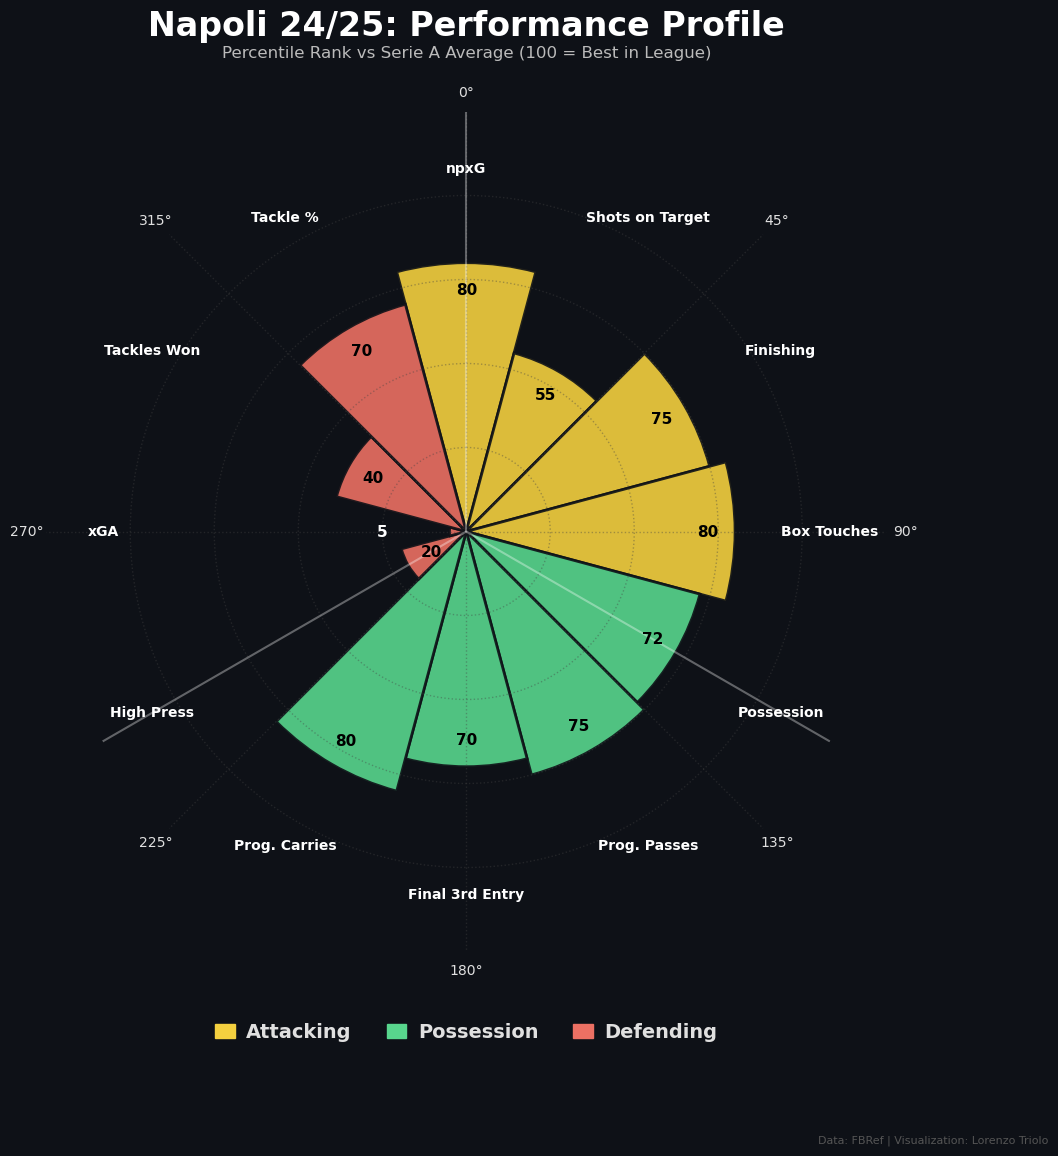

In [42]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import matplotlib.patches as mpatches

# --- 1. SETUP DATI & PERCENTILI ---
params = [
    # Attacco (Giallo)
    "npxG_90", "SoT/90", "G-xG", "Att Pen",
    # Possesso (Verde)
    "Poss", "PrgP", "passes_into_last_1/3", "PrgC",
    # Difesa (Rosso)
    "Att_3rd_tackles", "xGA_90", "TklW", "TKlW%"
]

labels = [
    "npxG", "Shots on Target", "Finishing", "Box Touches",
    "Possession", "Prog. Passes", "Final 3rd Entry", "Prog. Carries",
    "High Press", "xGA", "Tackles Won", "Tackle %"
]

team_name = "Napoli"

# Calcolo percentili
team_stats = df[df["Squad"] == team_name][params].values.flatten()
percentiles = []
for param, val in zip(params, team_stats):
    pct = stats.percentileofscore(df[param], val)
    percentiles.append(int(pct))

# --- 2. SETUP GRAFICO (STYLE DARK) ---
slice_colors = ["#F4D03F"] * 4 + ["#58D68D"] * 4 + ["#EC7063"] * 4

N = len(params)
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
width = 2 * np.pi / N

fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(polar=True))
fig.set_facecolor("#0e1117")
ax.set_facecolor("#0e1117")
ax.set_theta_offset(np.pi / 2)  # inizio in alto
ax.set_theta_direction(-1)      # senso orario

# --- 3. DISEGNA LE FETTE ---
bars = ax.bar(
    theta, percentiles, width=width, bottom=0.0,
    color=slice_colors, alpha=0.9, edgecolor="#0e1117", linewidth=2
)

# --- 4. TESTI E NUMERI ---
LABEL_RADIUS = 108

for angle, label, pct in zip(theta, labels, percentiles):
    # Numero percentile
    radius_num = pct - 8 if pct > 15 else pct + 20
    color_num = "black" if pct > 15 else "white"

    ax.text(angle, radius_num, str(pct),
            ha="center", va="center",
            fontsize=11, fontweight="bold", color=color_num)

    # Label metrica
    ax.text(angle, LABEL_RADIUS, label,
            ha="center", va="center",
            fontsize=10, fontweight="bold", color="white")

# --- 5. CERCHI DI RIFERIMENTO ---
ax.set_yticks([25, 50, 75, 100])
ax.set_yticklabels(["", "", "", ""], color="grey")
ax.set_ylim(0, 125)
ax.grid(color="#444444", alpha=0.4, linestyle=":", linewidth=1)
ax.spines["polar"].set_visible(False)

# Linee divisorie tra categorie (Attacco / Possesso / Difesa)
for i in [0, 4, 8]:
    ax.vlines(theta[i], 0, 125,
              color="white", linestyle="-",
              linewidth=1.5, alpha=0.35)

# --- 6. TITOLI, LEGENDA, FOOTER (centrati e compatti) ---
fig.suptitle(f"{team_name} 24/25: Performance Profile",
             y=0.965, fontsize=24, fontweight="bold", color="white")

fig.text(0.5, 0.925,
         "Percentile Rank vs Serie A Average (100 = Best in League)",
         ha="center", fontsize=12, color="#bbbbbb")

# Centra e “scala” l’axes polare per ridurre spazi vuoti
ax.set_position([0.10, 0.18, 0.80, 0.70])  # left, bottom, width, height

# Legenda centrata sotto (vera legend, non testi sparsi)
handles = [
    mpatches.Patch(color="#F4D03F", label="Attacking"),
    mpatches.Patch(color="#58D68D", label="Possession"),
    mpatches.Patch(color="#EC7063", label="Defending"),
]
leg = fig.legend(handles=handles, loc="lower center", ncol=3,
                 bbox_to_anchor=(0.5, 0.09),
                 frameon=False, fontsize=14,
                 handlelength=1.0, handletextpad=0.6,
                 columnspacing=1.8)
for t in leg.get_texts():
    t.set_fontweight("bold")

# Footer
fig.text(0.985, 0.02,
         "Data: FBRef | Visualization: Lorenzo Triolo",
         ha="right", fontsize=8, color="#555555")

plt.show()


## xG vs xGA Total Performance

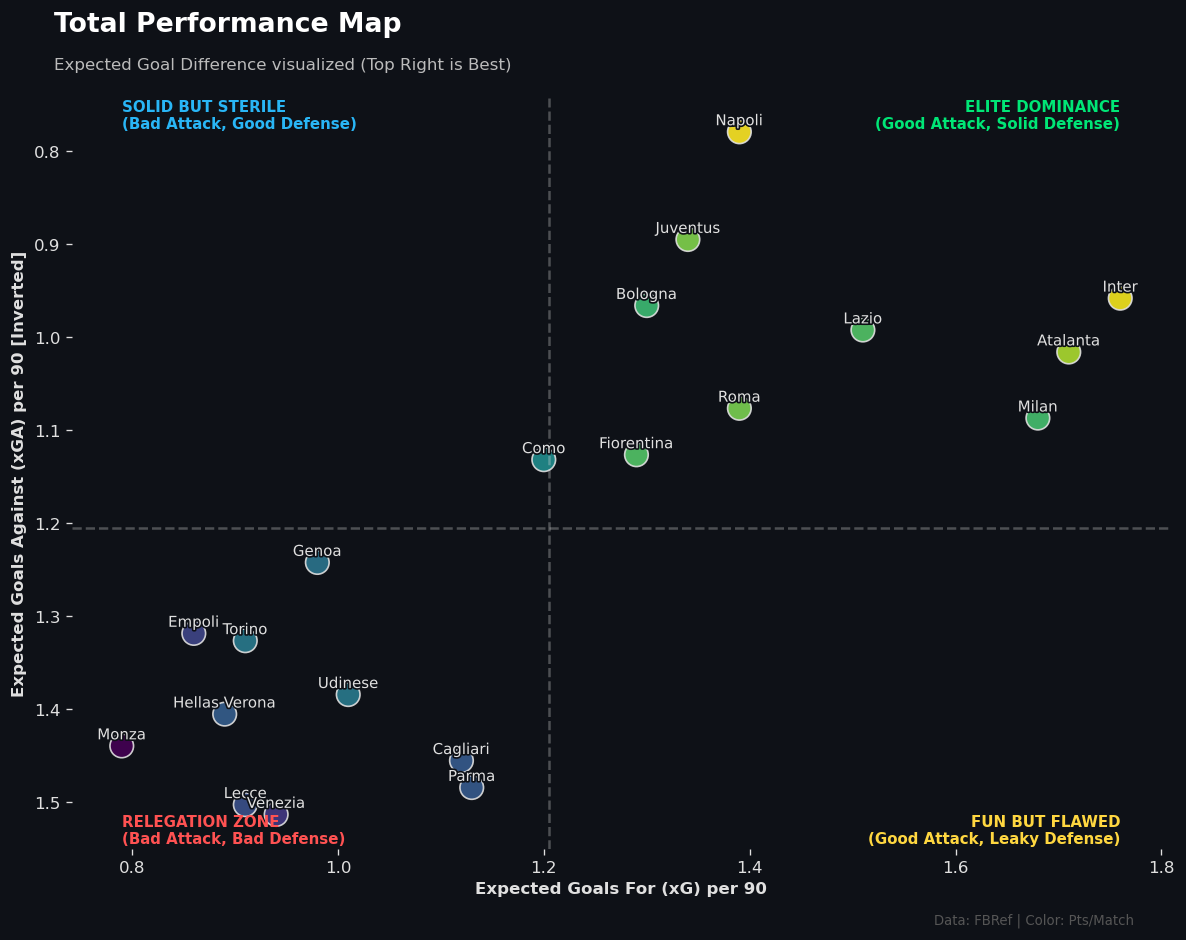

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patheffects as path_effects

# --- 1. SETUP STYLE DARK ---
BG_COLOR = '#0e1117'
TEXT_COLOR = '#E0E0E0'
GRID_COLOR = '#444444'

plt.rcParams.update({
    'figure.facecolor': BG_COLOR, 'axes.facecolor': BG_COLOR, 'text.color': TEXT_COLOR,
    'axes.labelcolor': TEXT_COLOR, 'xtick.color': TEXT_COLOR, 'ytick.color': TEXT_COLOR,
    'grid.color': GRID_COLOR, 'axes.spines.top': False, 'axes.spines.right': False
})

# --- 2. PLOT ---
fig, ax = plt.subplots(figsize=(10, 8), dpi=120)

# X = Attacco (xG/90), Y = Difesa (xGA/90)
# Nota: size fissa o basata su Punti
sns.scatterplot(
    data=df, 
    x="xG_90", 
    y="xGA_90",
    hue="Pts/MP",      # Colora per punti in classifica
    palette="viridis", # Giallo=Alta classifica, Viola=Bassa
    s=200, 
    alpha=0.9,
    edgecolor=TEXT_COLOR,
    linewidth=1,
    ax=ax,
    legend=False
)

# --- 3. INVERTIAMO ASSE Y ---
# Perché nel calcio subire MENO gol (numero basso) è meglio.
# Invertendo, le squadre migliori (basso xGA) vanno in ALTO.
ax.invert_yaxis() 

# --- 4. LINEE MEDIE (I 4 QUADRANTI) ---
mean_xg = df["xG_90"].mean()
mean_xga = df["xGA_90"].mean()

ax.axvline(mean_xg, color=TEXT_COLOR, linestyle='--', alpha=0.3)
ax.axhline(mean_xga, color=TEXT_COLOR, linestyle='--', alpha=0.3)

# --- 5. ETICHETTE E ANNOTAZIONI ---
for _, r in df.iterrows():
    ax.text(
        r["xG_90"], r["xGA_90"] - 0.02, # Piccolo offset verticale
        r["Squad"], 
        fontsize=9, color=TEXT_COLOR, ha='center', va='top',
        path_effects=[path_effects.withStroke(linewidth=2, foreground=BG_COLOR)]
    )

# Annotazioni Quadranti (Dopo aver invertito Y, "Alto" visivo significa "Basso valore numerico")
# Alto Destra: Tanti xG, Pochi xGA -> ELITE
ax.text(df["xG_90"].max(), df["xGA_90"].min(), "ELITE DOMINANCE\n(Good Attack, Solid Defense)", 
        color='#00E676', ha='right', va='bottom', fontsize=9, fontweight='bold')

# Basso Destra: Tanti xG, Tanti xGA -> FUN BUT FLAWED
ax.text(df["xG_90"].max(), df["xGA_90"].max(), "FUN BUT FLAWED\n(Good Attack, Leaky Defense)", 
        color='#FFD740', ha='right', va='top', fontsize=9, fontweight='bold')

# Alto Sinistra: Pochi xG, Pochi xGA -> BORING / SOLID
ax.text(df["xG_90"].min(), df["xGA_90"].min(), "SOLID BUT STERILE\n(Bad Attack, Good Defense)", 
        color='#29B6F6', ha='left', va='bottom', fontsize=9, fontweight='bold')

# Basso Sinistra: Pochi xG, Tanti xGA -> RELEGATION ZONE
ax.text(df["xG_90"].min(), df["xGA_90"].max(), "RELEGATION ZONE\n(Bad Attack, Bad Defense)", 
        color='#FF5252', ha='left', va='top', fontsize=9, fontweight='bold')

# --- 6. TITOLI ---
ax.set_xlabel("Expected Goals For (xG) per 90", fontweight='bold')
ax.set_ylabel("Expected Goals Against (xGA) per 90 [Inverted]", fontweight='bold')

fig.text(0.05, 0.95, "Total Performance Map", fontsize=16, fontweight='bold', color='white')
fig.text(0.05, 0.91, "Expected Goal Difference visualized (Top Right is Best)", fontsize=10, color='#bbbbbb')
fig.text(0.95, 0.02, "Data: FBRef | Color: Pts/Match", ha='right', fontsize=8, color='#555555')

plt.tight_layout(rect=[0, 0.03, 1, 0.90])
plt.show()


## Where do the defensive tackles happen?

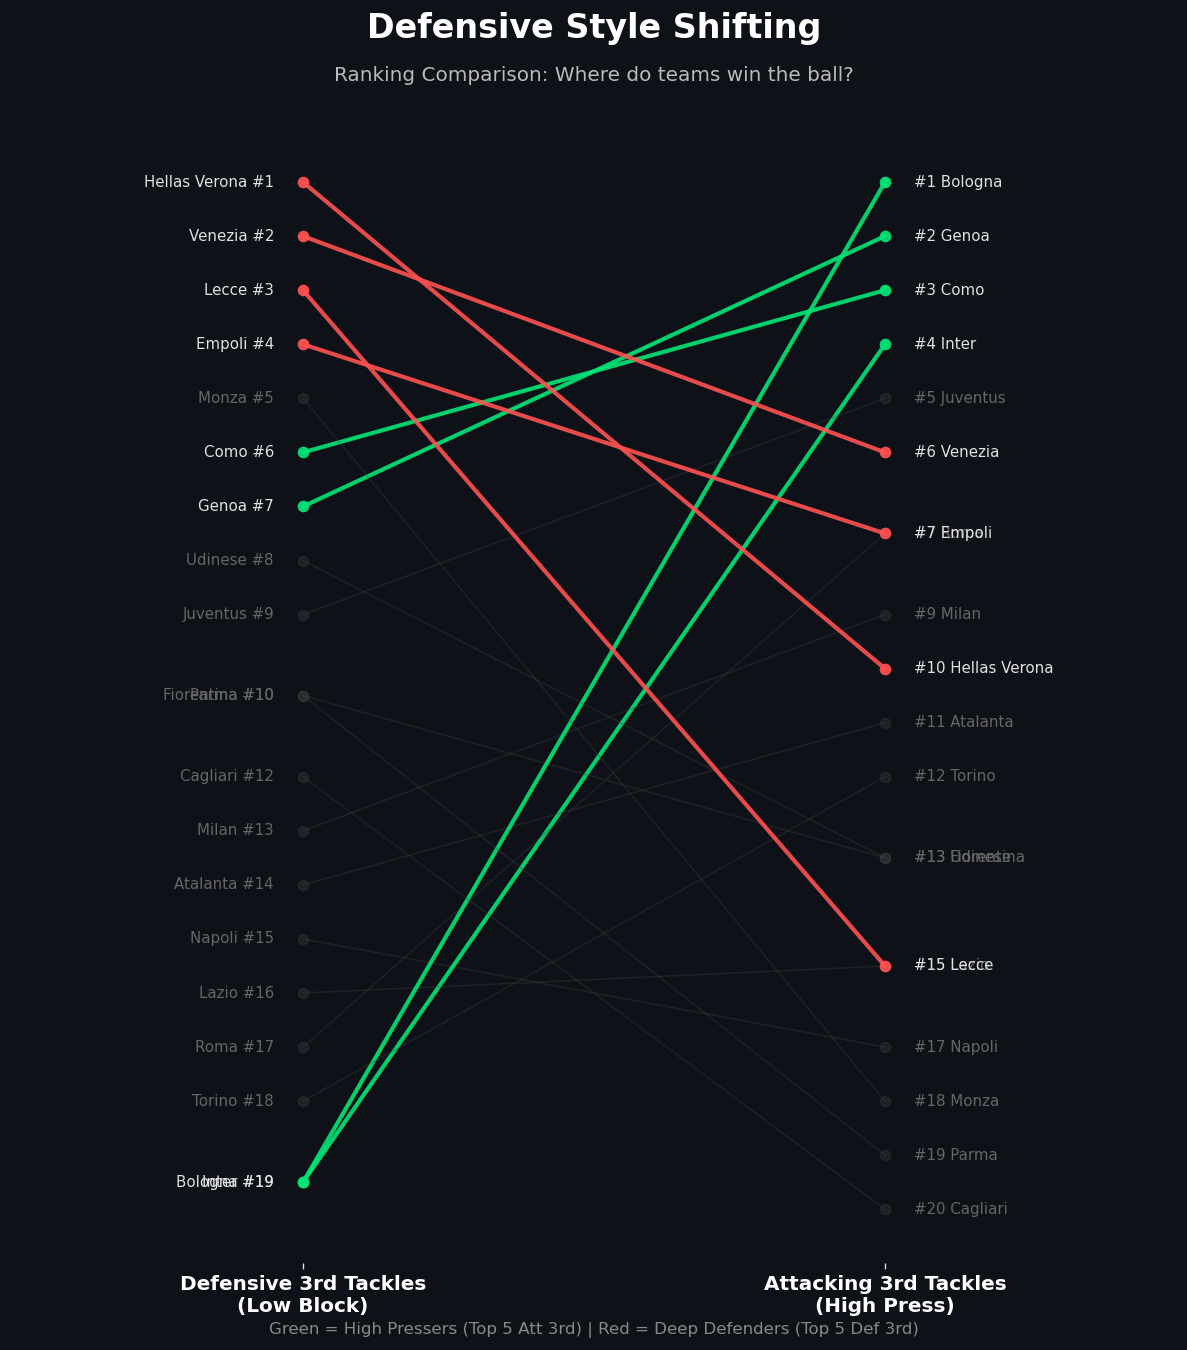

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# --- SETUP STYLE ---
BG_COLOR = '#0e1117'
TEXT_COLOR = '#E0E0E0'
plt.rcParams.update({'figure.facecolor': BG_COLOR, 'axes.facecolor': BG_COLOR, 'text.color': TEXT_COLOR,
                     'axes.spines.top': False, 'axes.spines.right': False, 'axes.spines.left': False, 'axes.spines.bottom': False})

# --- DATI ---
# Normalizziamo tra 0 e 1 per confrontare le pendenze (altrimenti i volumi diversi confondono)
# O usiamo i rank (classifica) che è ancora meglio per uno slope chart!
df_slope = df[['Squad', 'Def_3rd_tackles', 'Att_3rd_tackles']].copy()

# Creiamo i Rank (1 = Chi ne fa di più)
df_slope['Rank_Def'] = df_slope['Def_3rd_tackles'].rank(ascending=False)
df_slope['Rank_Att'] = df_slope['Att_3rd_tackles'].rank(ascending=False)

# --- PLOT ---
fig, ax = plt.subplots(figsize=(10, 12), dpi=120)

# Disegniamo le linee
for i, row in df_slope.iterrows():
    # Colore: Verde se sale (Pressing Alto), Rosso se scende (Difesa Bassa), Grigio se piatto
    # Nota: Qui "Salire" graficamente significa che il Rank migliora (numero più basso)
    # Ma per visualizzare, invertiamo l'asse Y così 1 è in alto.
    
    color = '#444444' # Default grigio
    alpha = 0.3
    lw = 1
    
    # Evidenziamo le squadre estreme (es. Atalanta o Napoli)
    if row['Rank_Att'] < 5: # Top 5 Pressing
        color = '#00E676' # Verde Neon
        alpha = 0.9
        lw = 2.5
    elif row['Rank_Def'] < 5: # Top 5 Catenaccio
        color = '#FF5252' # Rosso
        alpha = 0.9
        lw = 2.5
        
    # Linea
    ax.plot([1, 2], [row['Rank_Def'], row['Rank_Att']], color=color, alpha=alpha, linewidth=lw, marker='o')
    
    # Etichette Sinistra (Defensa)
    ax.text(0.95, row['Rank_Def'], f"{row['Squad']} #{int(row['Rank_Def'])}", 
            ha='right', va='center', fontsize=9, color=TEXT_COLOR if alpha > 0.5 else '#666')

    # Etichette Destra (Attacco)
    ax.text(2.05, row['Rank_Att'], f"#{int(row['Rank_Att'])} {row['Squad']}", 
            ha='left', va='center', fontsize=9, color=TEXT_COLOR if alpha > 0.5 else '#666')

# --- FORMATTAZIONE ---
ax.set_xlim(0.5, 2.5)
ax.set_ylim(21, 0) # Invertiamo asse Y (1 in alto)
ax.set_xticks([1, 2])
ax.set_xticklabels(["Defensive 3rd Tackles\n(Low Block)", "Attacking 3rd Tackles\n(High Press)"], 
                   fontsize=12, fontweight='bold', color='white')
ax.set_yticks([]) # Via i numeri Y

# Titoli
fig.text(0.5, 0.95, "Defensive Style Shifting", ha='center', fontsize=20, fontweight='bold', color='white')
fig.text(0.5, 0.92, "Ranking Comparison: Where do teams win the ball?", ha='center', fontsize=12, color='#bbbbbb')

# Legenda finta
fig.text(0.5, 0.05, "Green = High Pressers (Top 5 Att 3rd) | Red = Deep Defenders (Top 5 Def 3rd)", 
         ha='center', fontsize=10, color='#888')

plt.tight_layout(rect=[0, 0.05, 1, 0.90])
plt.show()


## Wasteful vs Clinical

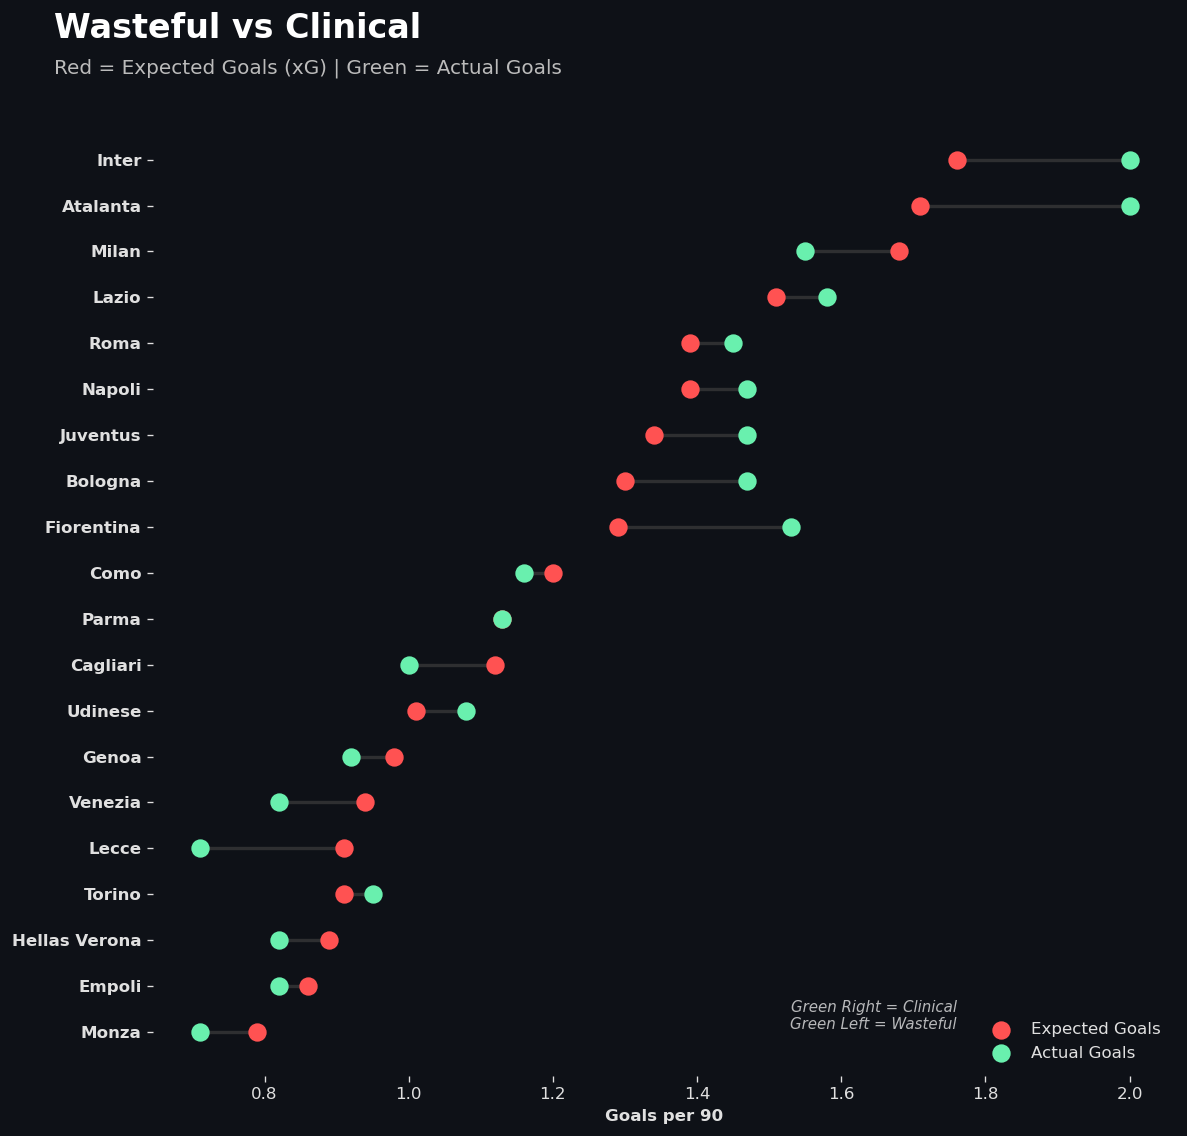

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines

# --- SETUP STYLE ---
BG_COLOR = '#0e1117'
TEXT_COLOR = '#E0E0E0'
plt.rcParams.update({'figure.facecolor': BG_COLOR, 'axes.facecolor': BG_COLOR, 'text.color': TEXT_COLOR,
                     'axes.spines.top': False, 'axes.spines.right': False, 'axes.spines.left': False, 
                     'ytick.color': TEXT_COLOR, 'xtick.color': TEXT_COLOR})

# --- DATI ---
# Ordiniamo per xG (così vediamo chi crea di più in alto)
df_dumb = df.sort_values("xG_90", ascending=True).reset_index(drop=True)

# --- PLOT ---
fig, ax = plt.subplots(figsize=(10, 10), dpi=120)

# Disegniamo le linee (Il "Manubrio")
for i, row in df_dumb.iterrows():
    # Linea grigia che collega i due punti
    ax.hlines(y=i, xmin=min(row['xG_90'], row['Gls_x90']), xmax=max(row['xG_90'], row['Gls_x90']), 
              color='#444444', alpha=0.6, linewidth=2)
    
    # Pallino xG (Attesa) - Colore spento
    ax.scatter(row['xG_90'], i, color='#FF5252', s=100, label='Expected Goals' if i == 0 else "", zorder=3)
    
    # Pallino Gol (Realtà) - Colore acceso
    ax.scatter(row['Gls_x90'], i, color='#69F0AE', s=100, label='Actual Goals' if i == 0 else "", zorder=3)

# --- FORMATTAZIONE ---
ax.set_yticks(range(len(df_dumb)))
ax.set_yticklabels(df_dumb["Squad"], fontsize=10, fontweight='bold')
ax.set_xlabel("Goals per 90", fontweight='bold')

# Titoli
fig.text(0.05, 0.95, "Wasteful vs Clinical", fontsize=20, fontweight='bold', color='white')
fig.text(0.05, 0.92, "Red = Expected Goals (xG) | Green = Actual Goals", fontsize=12, color='#bbbbbb')

# Annotazione Intelligente
ax.text(df_dumb['xG_90'].max(), 0, "Green Right = Clinical\nGreen Left = Wasteful", 
        color='white', ha='right', va='bottom', fontsize=9, style='italic', alpha=0.7)

# Legenda manuale (per evitare duplicati)
# La gestiamo con i label nel loop if i==0, quindi basta chiamare legend()
ax.legend(loc='lower right', facecolor=BG_COLOR, labelcolor=TEXT_COLOR, framealpha=0)

plt.tight_layout(rect=[0, 0.03, 1, 0.90])
plt.show()


## Grafico con campo da calcio

In [29]:
pip install mplsoccer

Note: you may need to restart the kernel to use updated packages.


C:\Users\HP\AppData\Local\Temp\ipykernel_21412\901467171.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '27.62295081967213' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[i, "plot_y"] = 40 + (offset * direction)


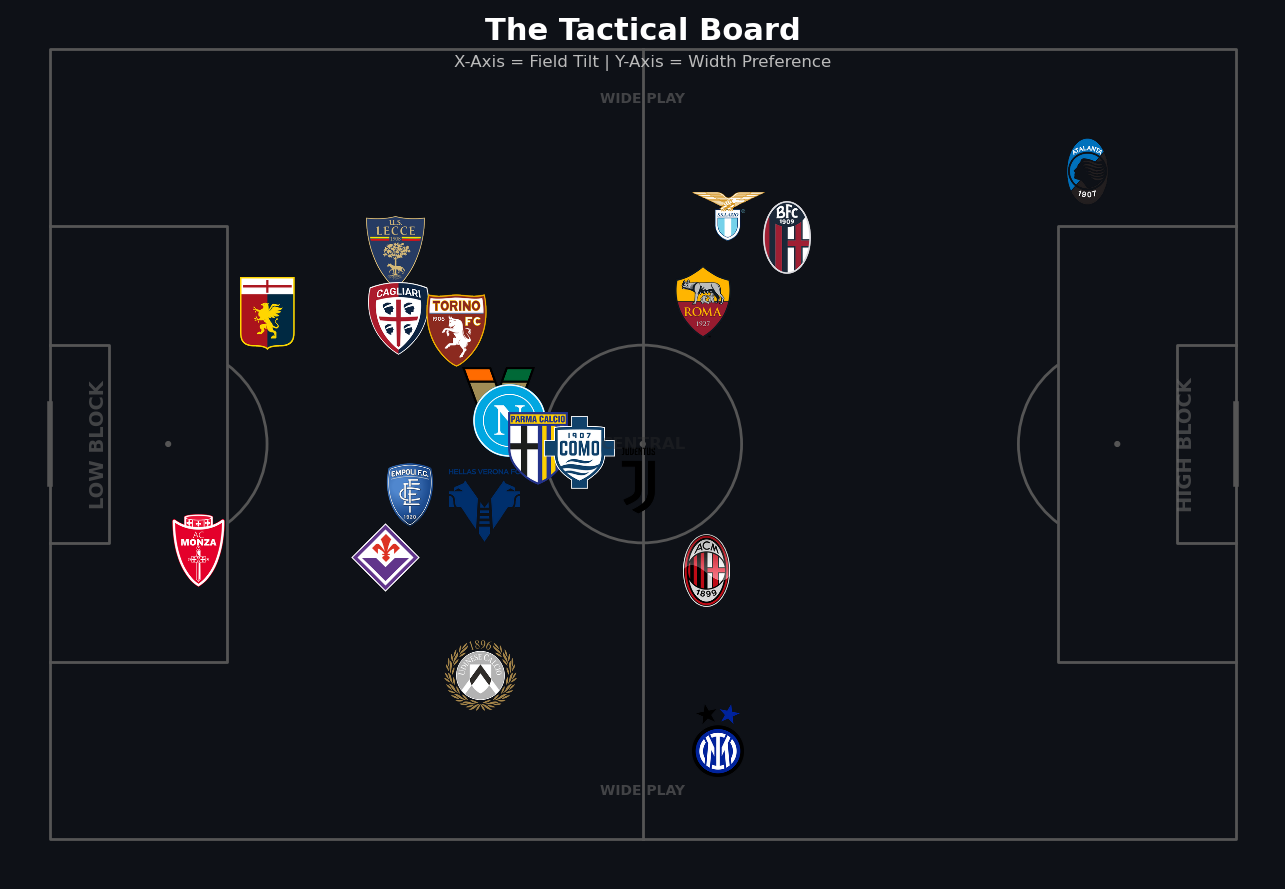

In [30]:
import matplotlib.pyplot as plt
from mplsoccer import Pitch
import numpy as np
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
import os # Per gestire i path in modo sicuro

# --- 1. PREPARAZIONE DATI ---
# Normalizziamo le metriche per adattarle alle coordinate StatsBomb (X=0-120, Y=0-80)

# ASSE LUNGHEZZA (X del plot): Baricentro (Field Tilt)
# Mappiamo lo Share (0.2 - 0.8) su coordinate Lunghezza (15 - 105)
# Più alto è lo share, più vanno verso la porta avversaria (Dx)
min_len, max_len = 15, 105
min_share, max_share = df["Att3rd_share"].min(), df["Att3rd_share"].max()
df["plot_x"] = ((df["Att3rd_share"] - min_share) / (max_share - min_share)) * (max_len - min_len) + min_len

# ASSE LARGHEZZA (Y del plot): Ampiezza (Cross)
# Centro campo = 40.
# Più cross fanno, più si allontanano da 40 verso 0 (Sopra) o 80 (Sotto).
df["plot_y"] = 40 # Partiamo dal centro

# Normalizziamo i cross tra 0 e 1
norm_cross = (df["CrsPA"] - df["CrsPA"].min()) / (df["CrsPA"].max() - df["CrsPA"].min())
spread = 25 # Quanto si allargano dal centro (max +/- 25 metri)

# Alterniamo Su/Giù in base alla classifica per estetica (evita sovrapposizioni)
for i, row in df.iterrows():
    # Se Rank è dispari -> Vai su (Y < 40). Se pari -> Vai giù (Y > 40)
    direction = -1 if row["Rk"] % 2 != 0 else 1 
    
    offset = (norm_cross[i] * spread) + 5 # Minimo 5 metri dal centro
    df.at[i, "plot_y"] = 40 + (offset * direction)


# --- 3. FUNZIONI LOGO OTTIMIZZATE ---
def get_logo_path(squad_name):
    # --- IL TUO PERCORSO ---
    base_path = r"C:\Users\HP\Desktop\data_science\primo_anno\DataViz\loghi"
    return os.path.join(base_path, f"{squad_name}.png")

def add_logo_on_pitch(ax, x, y, logo_path, zoom=0.12): # ZOOM RIDOTTO (era 0.25/0.35)
    try:
        img = Image.open(logo_path).convert("RGBA")
        # Opzionale: Resize forzato se le immagini originali hanno dimensioni diverse
        img.thumbnail((150, 150), Image.Resampling.LANCZOS) 
        
        imagebox = OffsetImage(img, zoom=zoom)
        ab = AnnotationBbox(imagebox, (x, y), frameon=False)
        ax.add_artist(ab)
    except Exception as e:
        # Fallback elegante
        ax.scatter(x, y, c='#FFD740', s=100, edgecolors='white')

# --- 4. DISEGNO CAMPO ORIZZONTALE ---
pitch = Pitch(
    pitch_type='statsbomb',  
    pitch_color='#0e1117',   
    line_color='#555555',    
    line_zorder=1,
    linewidth=2,
    half=False
)

fig, ax = pitch.draw(figsize=(14, 9))

# --- 5. POSIZIONAMENTO SQUADRE CON "JITTER" ---
# Ordiniamo per X (Field Tilt) per gestire le sovrapposizioni
df = df.sort_values("plot_x")

# Dizionario per tracciare le posizioni già occupate e spostare leggermente chi si sovrappone
occupied_positions = []

for _, row in df.iterrows():
    x_pos = row["plot_x"]
    y_pos = row["plot_y"]
    
    # Jitter anti-sovrapposizione manuale (molto semplice)
    # Se c'è già qualcuno vicino (distanza < 5 metri), sposta un po'
    for (ox, oy) in occupied_positions:
        if abs(x_pos - ox) < 6 and abs(y_pos - oy) < 8: # Se sono troppo vicini
            # Sposta un po' in alto o in basso a caso o in base al nome
            y_pos += 5 if y_pos < 40 else -5 
    
    occupied_positions.append((x_pos, y_pos))
    
    logo_path = get_logo_path(row["Squad"])
    add_logo_on_pitch(ax, x_pos, y_pos, logo_path, zoom=0.35) # Zoom perfetto per visione d'insieme

# --- 6. TESTI E ANNOTAZIONI ---
ax.text(5, 40, "LOW BLOCK", ha='center', va='center', color='#666666', fontsize=14, fontweight='bold', rotation=90, alpha=0.6)
ax.text(115, 40, "HIGH BLOCK", ha='center', va='center', color='#666666', fontsize=14, fontweight='bold', rotation=90, alpha=0.6)

ax.text(60, 5, "WIDE PLAY", ha='center', va='center', color='#666666', fontsize=10, fontweight='bold', alpha=0.6)
ax.text(60, 75, "WIDE PLAY", ha='center', va='center', color='#666666', fontsize=10, fontweight='bold', alpha=0.6)
ax.text(60, 40, "CENTRAL", ha='center', va='center', color='#333333', fontsize=12, fontweight='bold', alpha=0.3)

fig.text(0.5, 0.95, "The Tactical Board", ha='center', fontsize=22, fontweight='bold', color='white')
fig.text(0.5, 0.92, "X-Axis = Field Tilt | Y-Axis = Width Preference", ha='center', fontsize=12, color='#bbbbbb')

plt.show()
